In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from wordcloud import WordCloud
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

In [ ]:
!pip install WordCloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.2 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 544.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 525.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.2 kB 655.8 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.1 MB/s eta 0:00:00


In [2]:

# for colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for colab
#file_path = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/Data Preprocessing _ West_Coast_Cleaned Data/west_coast_rental_cleaned_df.csv'file_path = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/Data Preprocessing _ West_Coast_Cleaned Data/west_coast_rental_cleaned_df.csv'
#file_path = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Preprocessed Data/Preprocessed_data_v0.1.csv'
#df = pd.read_csv(file_path)

In [ ]:
df = pd.read_csv('D:/MSDA_SJSU/Data 230/Project/Preprocessed_data_v0.1.csv')

In [ ]:
df.head()

listing_url_present                                               name  \
0                    1  (B) Furnished Efficiency Studio near Union Square   
1                    1   2 Private Rooms in SF. Walk to Bart. Modern Home   
2                    1         Massive 1-bedroom condo in the heart of SF   
3                    1      Large 1-bedroom in a condo in the heart of SF   
4                    1                Cozy 1-bedroom condo with roof deck   

                                         description  picture_url_present  \
0  This special place is close to everything, mak...                    1   
1  Enjoy a stylish and zen experience at this mod...                    1   
2  Spacious 1-bed 1-bath condo in downtown SF nea...                    1   
3  Spacious private bedroom in a 1-bed 1-bath con...                    1   
4  1 bedroom condo in a new building located in t...                    1   

   host_url_present  host_name  host_since host_response_time  \
0                 1  Christine  2018-05-17     within an hour   
1                 1     Hossna  2021-11-26     within an hour   
2                 1     Duolin  2012-04-19     within an hour   
3                 1     Duolin  2012-04-19     within an hour   
4                 1        Dan  2012-05-02     within an hour   

  host_response_rate host_acceptance_rate  ...  \
0               100%                 100%  ...   
1               100%                  94%  ...   
2               100%                  75%  ...   
3               100%                  75%  ...   
4               100%                 100%  ...   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            1   
3                                            1   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month       State  \
0                                            0               0.03  California   
1                                            0               0.63  California   
2                                            0               0.57  California   
3                                            0               1.24  California   
4                                            0               0.34  California   

            City  hosting_experience days_since_first_review  \
0  San Francisco                2385                  1202.0   
1  San Francisco                1096                  1078.0   
2  San Francisco                4604                   869.0   
3  San Francisco                4604                  1024.0   
4  San Francisco                4591                   880.0   

  days_since_last_review relevant_amenities_count bathroom_type  
0                 1202.0                        0  Private bath  
1                  521.0                        0  Private bath  
2                  117.0                        0  Private bath  
3                  543.0                        0   Shared bath  
4                  469.0                        0  Private bath  

[5 rows x 68 columns]

In [ ]:
def find_mixed_dtypes(df):
    mixed_columns = []

    for col in df.columns:
        # Find the unique data types in each column
        unique_dtypes = df[col].apply(type).nunique()

        # If more than one data type is found, append the column name
        if unique_dtypes > 1:
            mixed_columns.append(col)

    return mixed_columns

# Call the function and print columns with mixed data types
mixed_type_columns = find_mixed_dtypes(df)
print("Columns with mixed data types:", mixed_type_columns)

Columns with mixed data types: ['first_review', 'last_review']


In [ ]:
for col in mixed_type_columns:
    print(f"Data types in column {col}:")
    print(df[col].apply(type).value_counts())

Data types in column first_review:
first_review
<class 'str'>      71010
<class 'float'>    20097
Name: count, dtype: int64
Data types in column last_review:
last_review
<class 'str'>      71010
<class 'float'>    20097
Name: count, dtype: int64


In [ ]:
# Examine continuous variables

df.describe()

listing_url_present  picture_url_present  host_url_present  \
count              91107.0              91107.0           91107.0   
mean                   1.0                  1.0               1.0   
std                    0.0                  0.0               0.0   
min                    1.0                  1.0               1.0   
25%                    1.0                  1.0               1.0   
50%                    1.0                  1.0               1.0   
75%                    1.0                  1.0               1.0   
max                    1.0                  1.0               1.0   

       host_thumbnail_url_present  host_picture_url_present  \
count                91107.000000              91107.000000   
mean                     0.999978                  0.999978   
std                      0.004685                  0.004685   
min                      0.000000                  0.000000   
25%                      1.000000                  1.000000   
50%                      1.000000                  1.000000   
75%                      1.000000                  1.000000   
max                      1.000000                  1.000000   

       host_listings_count  host_total_listings_count      latitude  \
count          91107.00000               91107.000000  91107.000000   
mean             138.43517                 183.380465     36.290422   
std              689.54536                 858.414720      4.263776   
min                0.00000                   0.000000     32.540760   
25%                1.00000                   2.000000     33.993041   
50%                3.00000                   4.000000     34.103410   
75%               12.00000                  18.000000     37.591855   
max             4682.00000                9019.000000     47.734087   

          longitude  accommodates  ...  review_scores_value  \
count  91107.000000  91107.000000  ...         91107.000000   
mean    -119.616520      4.032182  ...             4.727621   
std        2.080257      2.851354  ...             0.362694   
min     -123.096950      1.000000  ...             0.000000   
25%     -122.247055      2.000000  ...             4.690000   
50%     -118.402700      3.000000  ...             4.810000   
75%     -118.203565      6.000000  ...             4.890000   
max     -116.936852     16.000000  ...             5.000000   

       calculated_host_listings_count  \
count                    91107.000000   
mean                        18.995500   
std                         60.803158   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          9.000000   
max                        569.000000   

       calculated_host_listings_count_entire_homes  \
count                                 91107.000000   
mean                                     15.815108   
std                                      58.898611   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       5.000000   
max                                     569.000000   

       calculated_host_listings_count_private_rooms  \
count                                  91107.000000   
mean                                       2.569232   
std                                       15.843114   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                      268.000000   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
count                                 91107.000000       91107.000000   
mean                                      0.165970           1.452215   
std                                  

In [ ]:
df['price'].mean()

254.78456649873226

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91107 entries, 0 to 91106
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url_present                           91107 non-null  int64         
 1   name                                          91107 non-null  object        
 2   description                                   91107 non-null  object        
 3   picture_url_present                           91107 non-null  int64         
 4   host_url_present                              91107 non-null  int64         
 5   host_name                                     91107 non-null  object        
 6   host_since                                    91107 non-null  datetime64[ns]
 7   host_response_time                            91107 non-null  object        
 8   host_response_rate                            91107 non-null  obje

In [ ]:
## Not numerical columns
df.select_dtypes(exclude=['int64', 'float64']).columns

Index(['name', 'description', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'amenities', 'has_availability', 'first_review',
       'last_review', 'instant_bookable', 'State', 'City', 'bathroom_type'],
      dtype='object')

In [ ]:
## Convert host_since into date field
#df['host_since'] = pd.to_datetime(df['host_since'])

In [ ]:
## Calculate hosting_experience as current_date - host_since
#df['hosting_experience'] = (pd.to_datetime('today') - df['host_since']).dt.days
#print(df['hosting_experience'])

0        2386
1        1097
2        4605
3        4605
4        4592
         ... 
91102    1314
91103    2417
91104     159
91105     175
91106    1399
Name: hosting_experience, Length: 91107, dtype: int64


In [ ]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['listing_url_present', 'picture_url_present', 'host_url_present',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listin

In [ ]:
numerical_df = df[numerical_cols]
numerical_df.head()

listing_url_present  picture_url_present  host_url_present  \
0                    1                    1                 1   
1                    1                    1                 1   
2                    1                    1                 1   
3                    1                    1                 1   
4                    1                    1                 1   

   host_thumbnail_url_present  host_picture_url_present  host_listings_count  \
0                           1                         1                  1.0   
1                           1                         1                  3.0   
2                           1                         1                  2.0   
3                           1                         1                  2.0   
4                           1                         1                  1.0   

   host_total_listings_count  latitude  longitude  accommodates  ...  \
0                        4.0  37.79063 -122.40867             2  ...   
1                        3.0  37.71753 -122.45155             3  ...   
2                        3.0  37.78646 -122.39100             3  ...   
3                        3.0  37.78694 -122.38968             2  ...   
4                        2.0  37.76314 -122.38728             4  ...   

   review_scores_value  calculated_host_listings_count  \
0                 5.00                               1   
1                 4.48                               1   
2                 4.73                               2   
3                 4.87                               2   
4                 4.89                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             1   
2                                             1   
3                                             1   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                            0               0.03   
1                                            0               0.63   
2                                            0               0.57   
3                                            0               1.24   
4                                            0               0.34   

   hosting_experience  days_since_first_review  days_since_last_review  \
0                2385                   1202.0                  1202.0   
1                1096                   1078.0                   521.0   
2                4604                    869.0                   117.0   
3                4604                   1024.0                   543.0   
4                4591                    880.0                   469.0   

   relevant_amenities_count  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 45 columns]

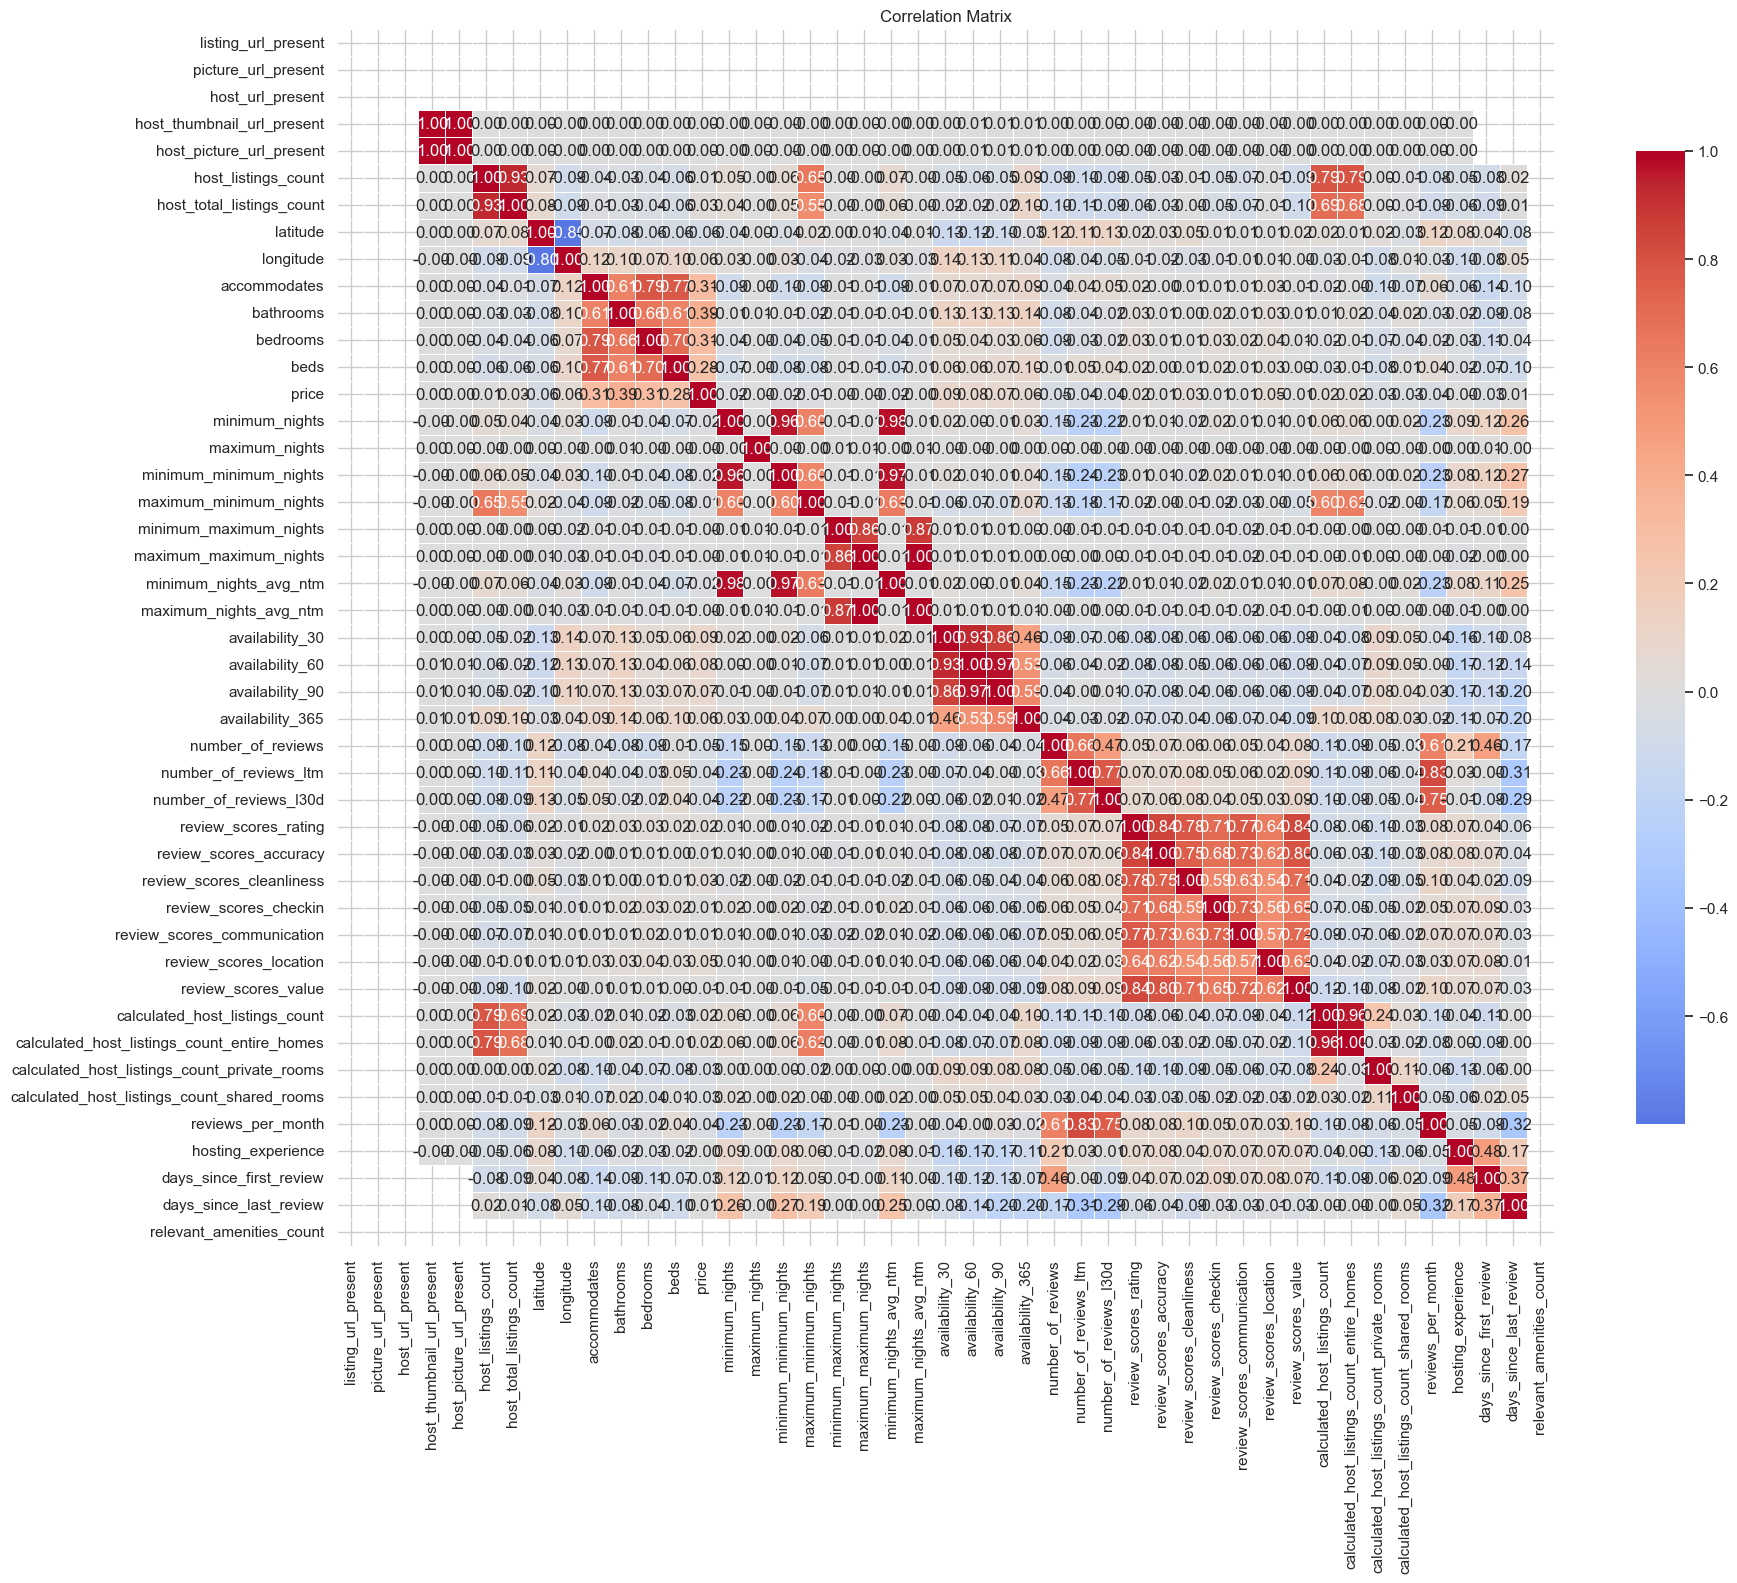

In [ ]:
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure for the size of the plot (to ensure readability)
plt.figure(figsize=(20, 16))

# Generate a heatmap with annotations for the correlation values
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Display the plot
plt.title('Correlation Matrix')
plt.tight_layout()  # Ensures the entire heatmap fits into the plot area
plt.show()


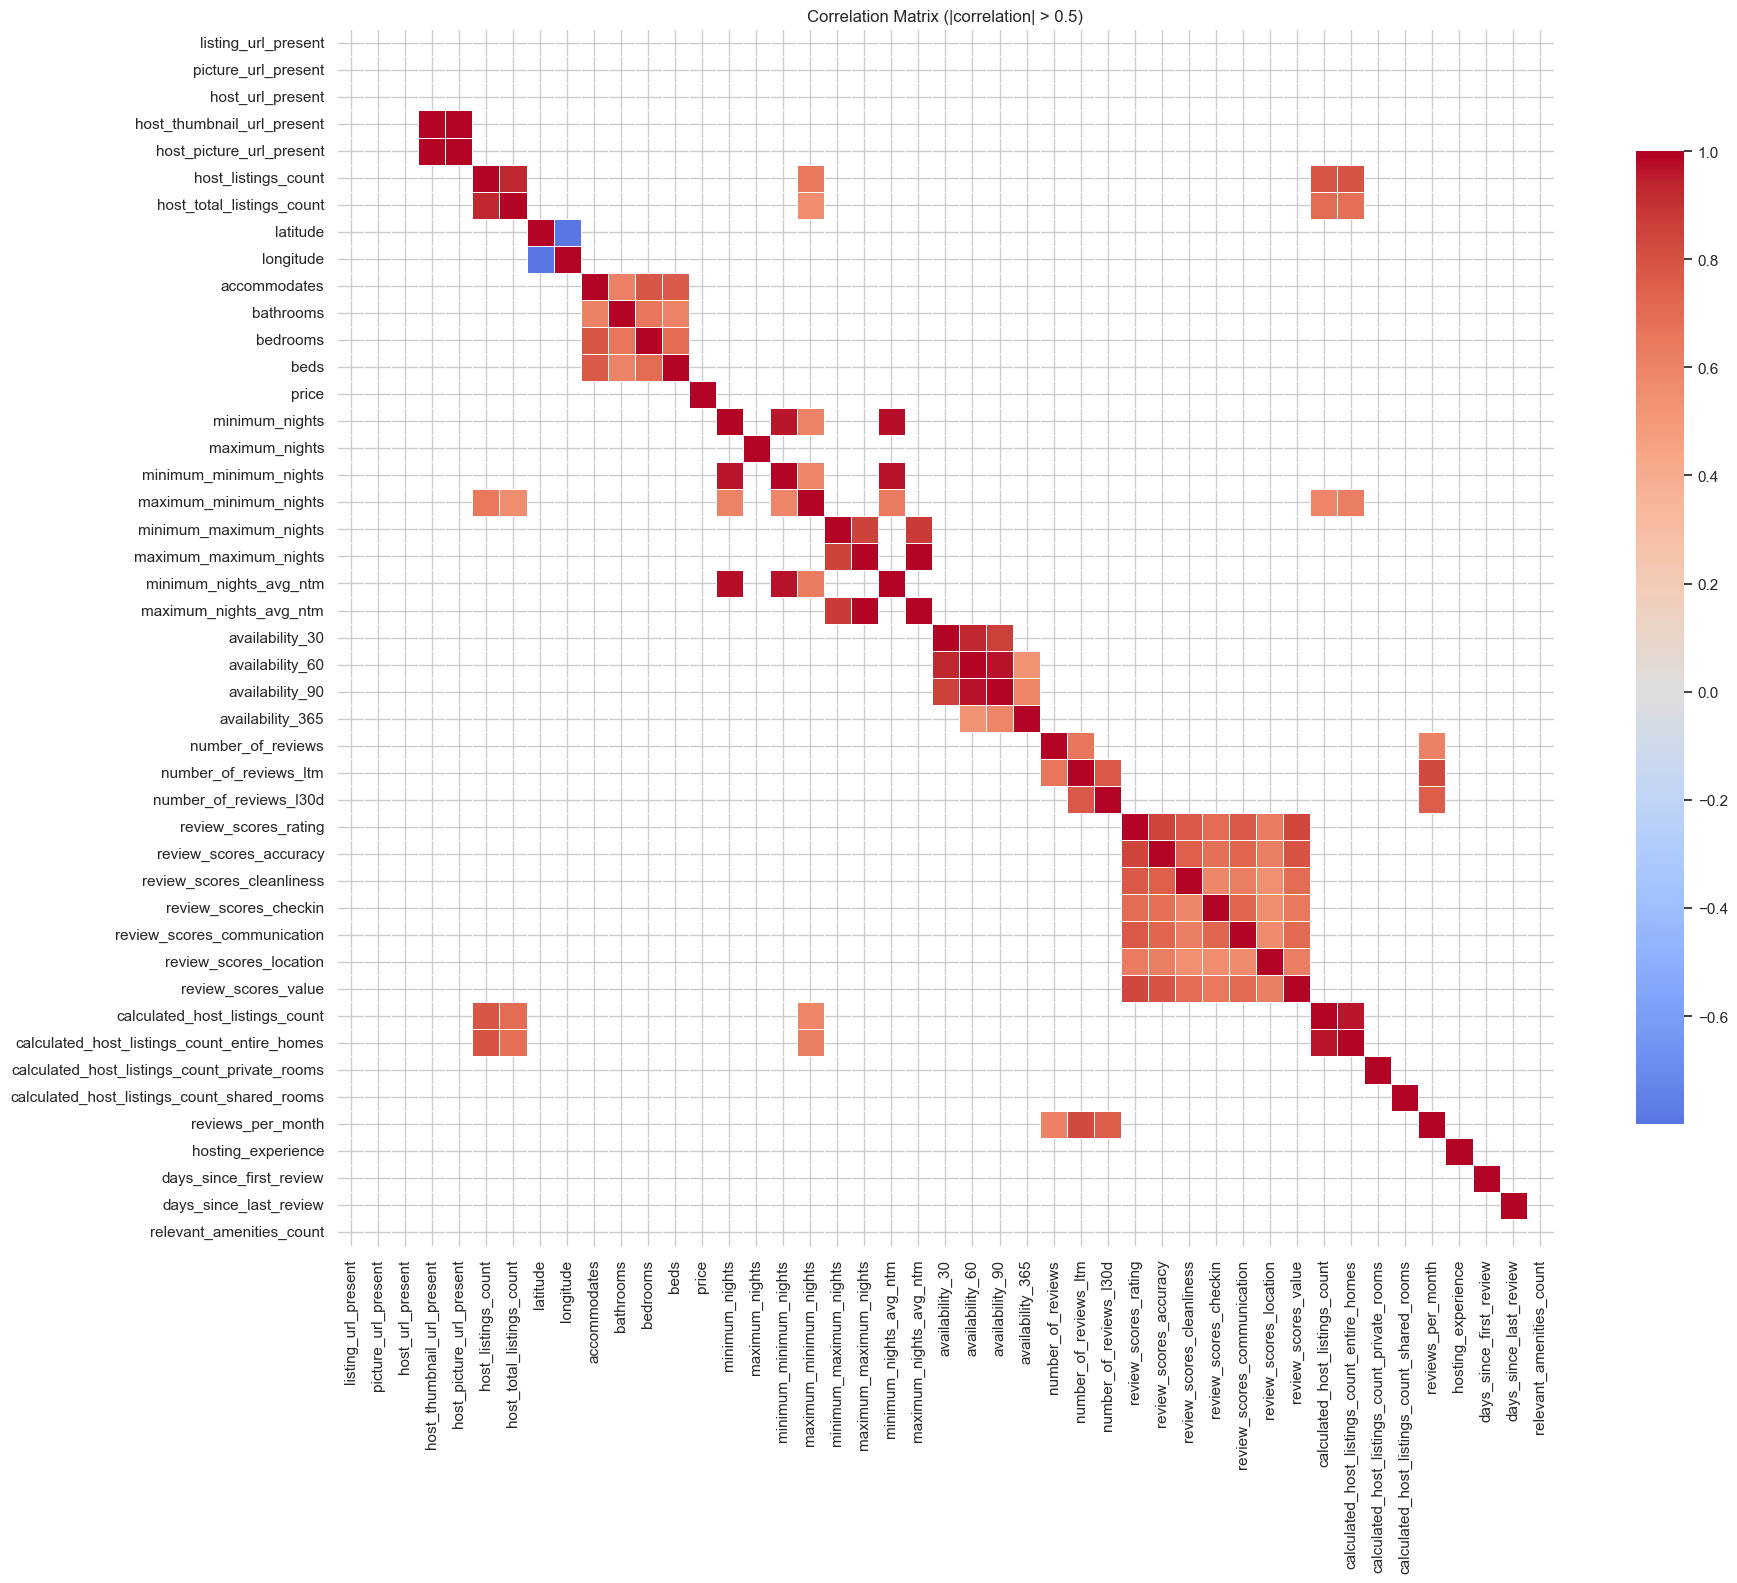

In [ ]:
## Generating Heatmap for the correlation coefficient value more than 0.5 or less than -0.5 to identify strong correlation
correlation_matrix = numerical_df.corr()

# Filter the correlation matrix to show only values greater than 0.5 or less than -0.5
filtered_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Set up the matplotlib figure for the size of the plot (to ensure readability)
plt.figure(figsize=(20, 16))

# Generate a heatmap with annotations for the correlation values
sns.heatmap(filtered_corr, annot=False, fmt=".1f", cmap="coolwarm", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, mask=filtered_corr.isnull())

# Display the plot
plt.title('Correlation Matrix (|correlation| > 0.5)')
plt.tight_layout()  # Ensures the entire heatmap fits into the plot area
plt.show()



### We will check distribution for all the numerical variables.

In [ ]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['listing_url_present', 'picture_url_present', 'host_url_present',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listin

In [ ]:
### We will be checking Statistics of the each of the numerical variables

numerical_df.describe()

listing_url_present  picture_url_present  host_url_present  \
count              91107.0              91107.0           91107.0   
mean                   1.0                  1.0               1.0   
std                    0.0                  0.0               0.0   
min                    1.0                  1.0               1.0   
25%                    1.0                  1.0               1.0   
50%                    1.0                  1.0               1.0   
75%                    1.0                  1.0               1.0   
max                    1.0                  1.0               1.0   

       host_thumbnail_url_present  host_picture_url_present  \
count                91107.000000              91107.000000   
mean                     0.999978                  0.999978   
std                      0.004685                  0.004685   
min                      0.000000                  0.000000   
25%                      1.000000                  1.000000   
50%                      1.000000                  1.000000   
75%                      1.000000                  1.000000   
max                      1.000000                  1.000000   

       host_listings_count  host_total_listings_count      latitude  \
count          91107.00000               91107.000000  91107.000000   
mean             138.43517                 183.380465     36.290422   
std              689.54536                 858.414720      4.263776   
min                0.00000                   0.000000     32.540760   
25%                1.00000                   2.000000     33.993041   
50%                3.00000                   4.000000     34.103410   
75%               12.00000                  18.000000     37.591855   
max             4682.00000                9019.000000     47.734087   

          longitude  accommodates  ...  review_scores_value  \
count  91107.000000  91107.000000  ...         91107.000000   
mean    -119.616520      4.032182  ...             4.727621   
std        2.080257      2.851354  ...             0.362694   
min     -123.096950      1.000000  ...             0.000000   
25%     -122.247055      2.000000  ...             4.690000   
50%     -118.402700      3.000000  ...             4.810000   
75%     -118.203565      6.000000  ...             4.890000   
max     -116.936852     16.000000  ...             5.000000   

       calculated_host_listings_count  \
count                    91107.000000   
mean                        18.995500   
std                         60.803158   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          9.000000   
max                        569.000000   

       calculated_host_listings_count_entire_homes  \
count                                 91107.000000   
mean                                     15.815108   
std                                      58.898611   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       5.000000   
max                                     569.000000   

       calculated_host_listings_count_private_rooms  \
count                                  91107.000000   
mean                                       2.569232   
std                                       15.843114   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                      268.000000   

       calculated_host_listings_count_shared_rooms  reviews_per_month  \
count                                 91107.000000       91107.000000   
mean                                      0.165970           1.452215   
std                                  

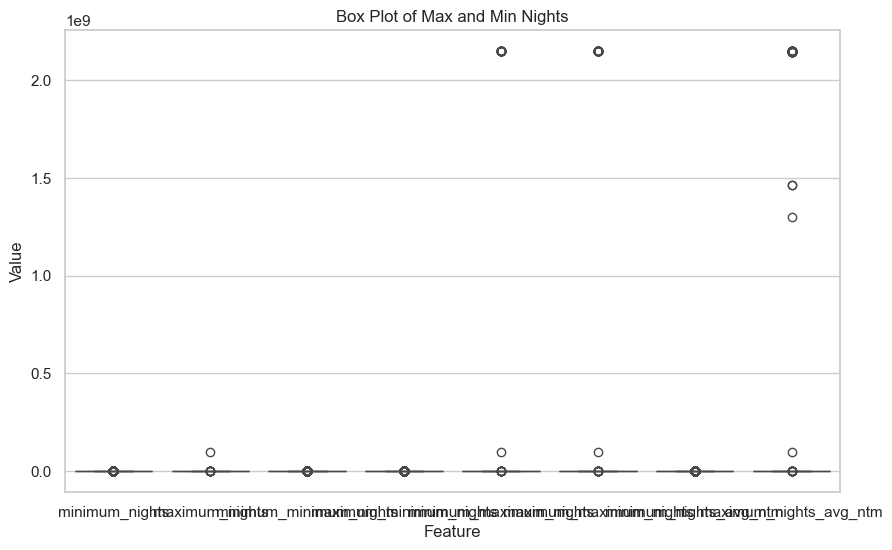

In [ ]:
## Boxplot

columns_to_plot=['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_plot])
plt.title("Box Plot of Max and Min Nights")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

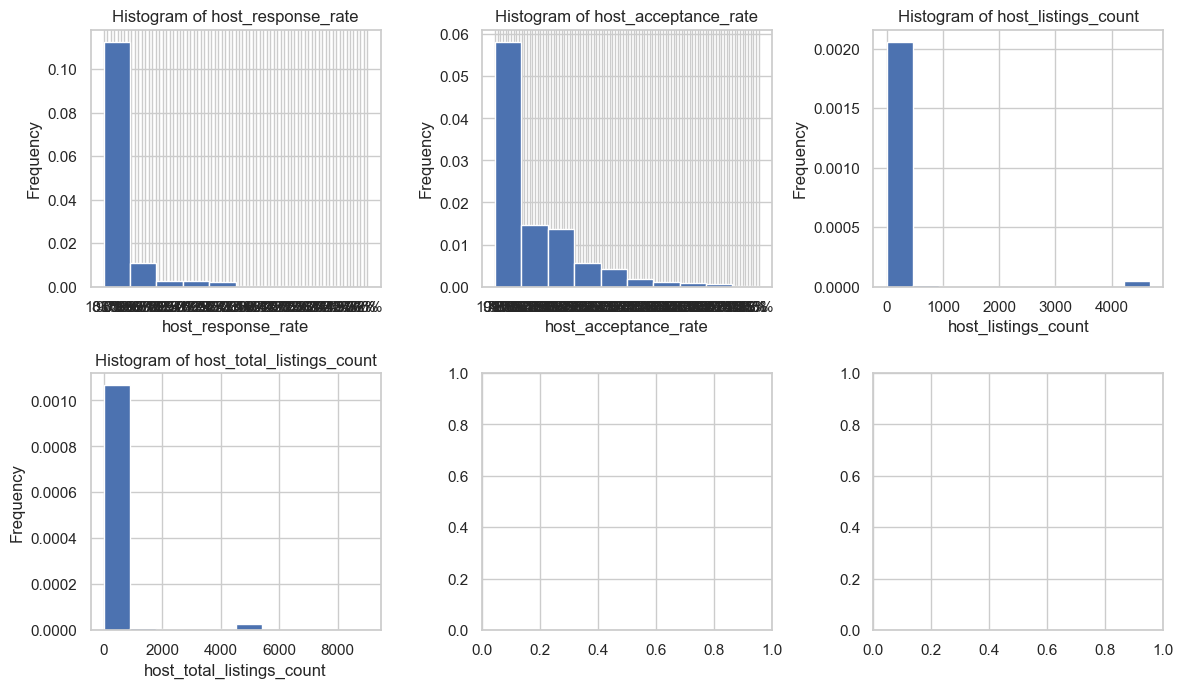

In [ ]:
### Distribution for Host related numerical features


selected_num_col2= df[['host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count']]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Plot each feature distribution
for i, feature in enumerate(selected_num_col2.columns):
    axes[i // 3, i % 3].hist(selected_num_col2[feature], bins=10, density=True)
#    sns.displot(sel_feature, x=feature, kind="kde")
    axes[i // 3, i % 3].set_title(f"Histogram of {feature}")
    axes[i // 3, i % 3].set_xlabel(feature)
    axes[i // 3, i % 3].set_ylabel('Frequency')
axes[2, 0].remove()
axes[2, 1].remove()
axes[2, 2].remove()
plt.tight_layout()
plt.show()

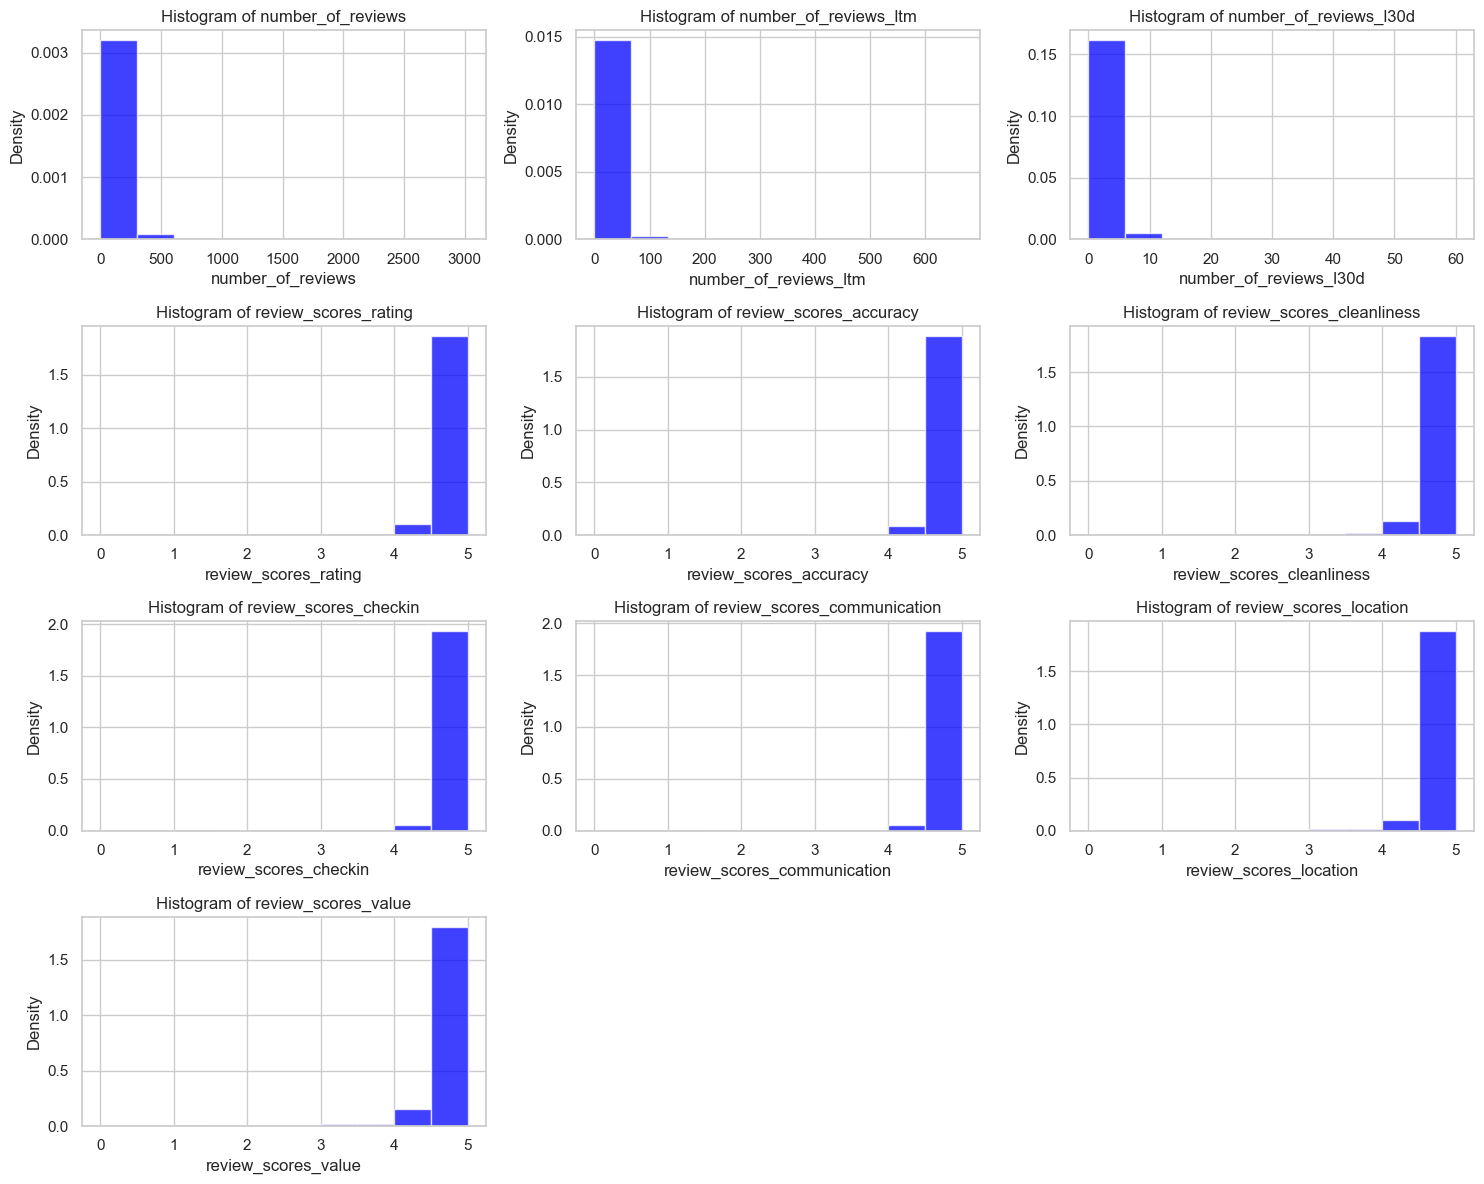

In [ ]:
### Distribution of review related features

import matplotlib.pyplot as plt

selected_num_col3 = df[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                        'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin',
                        'review_scores_communication', 'review_scores_location',
                        'review_scores_value']]

# Adjust grid to fit all 10 plots (4 rows × 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature distribution
for i, feature in enumerate(selected_num_col3.columns):
    axes[i].hist(selected_num_col3[feature].dropna(), bins=10, density=True, alpha=0.75, color='blue')
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(len(selected_num_col3.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
df['review_scores_rating'].head()

0    5.00
1    4.62
2    4.80
3    4.87
4    5.00
Name: review_scores_rating, dtype: float64

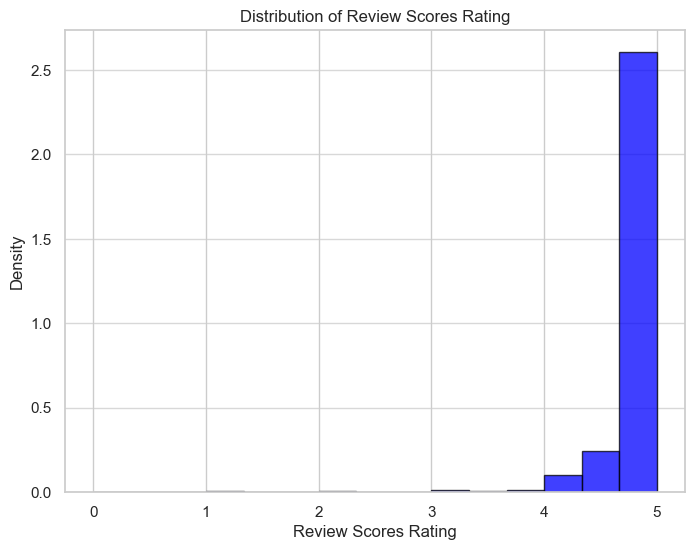

In [ ]:
## Distribution for Review score rating

# Dropping NaN values to ensure clean data for plotting
review_scores_rating = df['review_scores_rating'].dropna()

# Plotting the distribution of 'review_scores_rating'
plt.figure(figsize=(8, 6))
plt.hist(review_scores_rating, bins=15, density=True, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
df['review_scores_rating'].describe()

count    91107.000000
mean         4.813526
std          0.332600
min          0.000000
25%          4.800000
50%          4.900000
75%          4.980000
max          5.000000
Name: review_scores_rating, dtype: float64

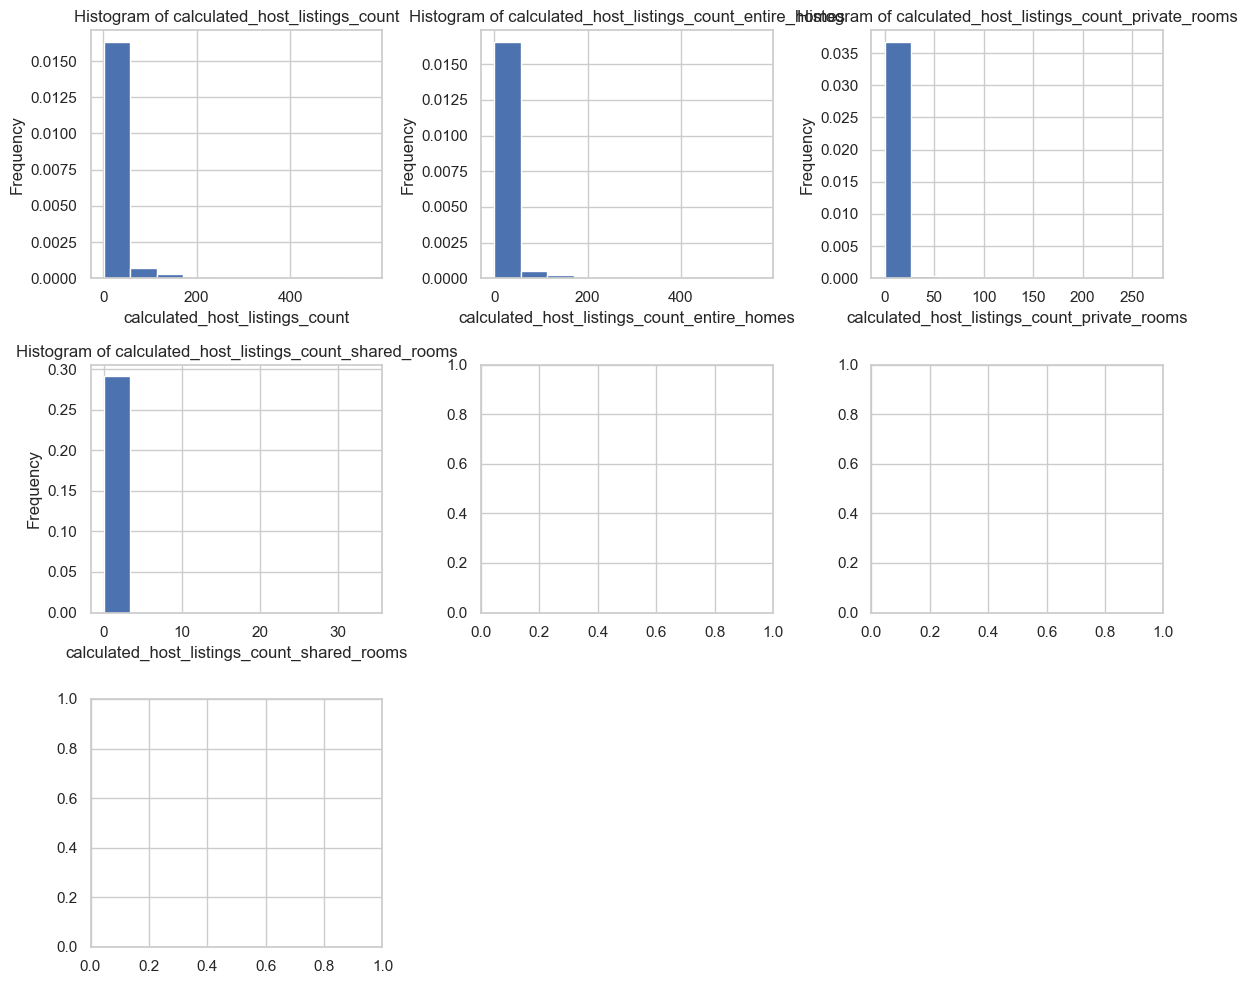

In [ ]:
### Distribution of host listing related features

selected_num_col4= df[['calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Plot each feature distribution
for i, feature in enumerate(selected_num_col4.columns):
    axes[i // 3, i % 3].hist(selected_num_col4[feature], bins=10, density=True)

    axes[i // 3, i % 3].set_title(f"Histogram of {feature}")
    axes[i // 3, i % 3].set_xlabel(feature)
    axes[i // 3, i % 3].set_ylabel('Frequency')

axes[2, 1].remove()
axes[2, 2].remove()
plt.tight_layout()
plt.show()

In [ ]:
#top 10 cities filtering out California
#df['City'] = df['City'].str.title()
#df['State'] = df['State'].str.title()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2466026420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='City', order=top10_cities[top10_cities != 'California'], palette="viridis")


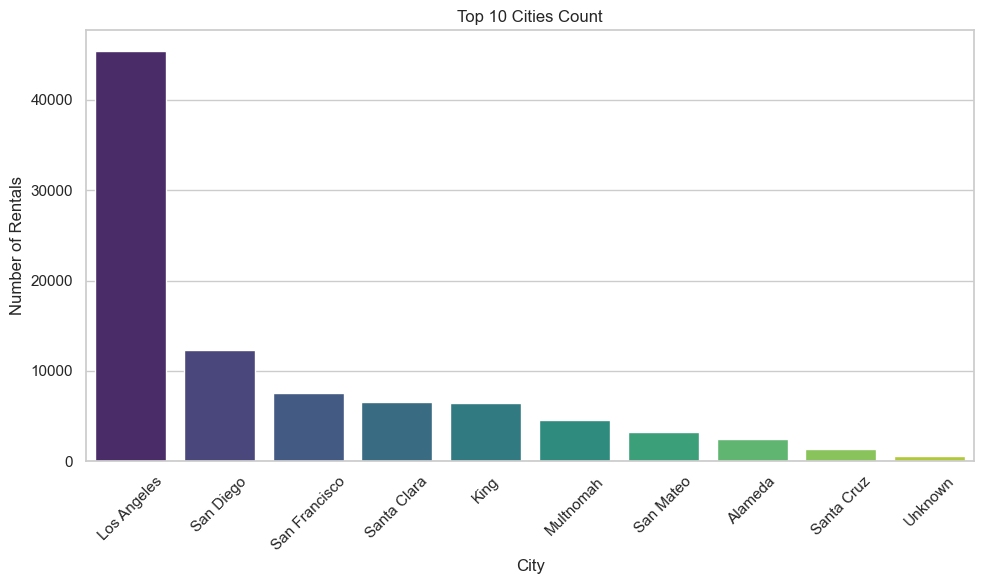

In [ ]:
# Get the top 10 cities based on rental count
top10_cities = df['City'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 cities, excluding 'California'
filtered_df = df[df['City'].isin(top10_cities) & (df['City'] != 'California')]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='City', order=top10_cities[top10_cities != 'California'], palette="viridis")
plt.xticks(rotation=45)  # Rotate city names for readability
plt.title("Top 10 Cities Count")
plt.xlabel("City")
plt.ylabel("Number of Rentals")
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\3929306788.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='City', order=top10_cities, palette="viridis")


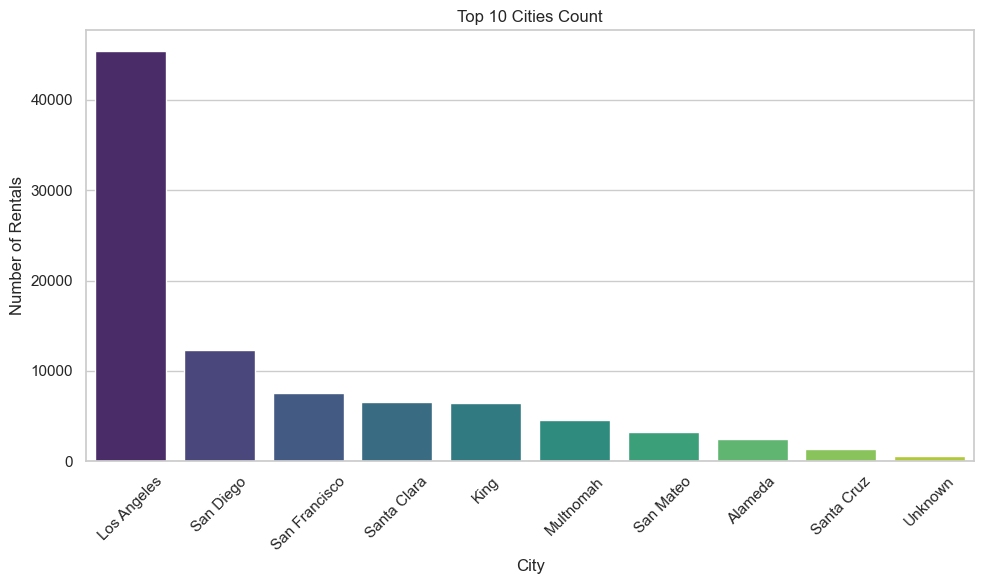

In [ ]:
top10_cities = df['City'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 cities
filtered_df = df[df['City'].isin(top10_cities)]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='City', order=top10_cities, palette="viridis")
plt.xticks(rotation=45)  # Rotate city names for readability
plt.title("Top 10 Cities Count")
plt.xlabel("City")
plt.ylabel("Number of Rentals")
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2186003024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='State', order=top10_states, palette="viridis")


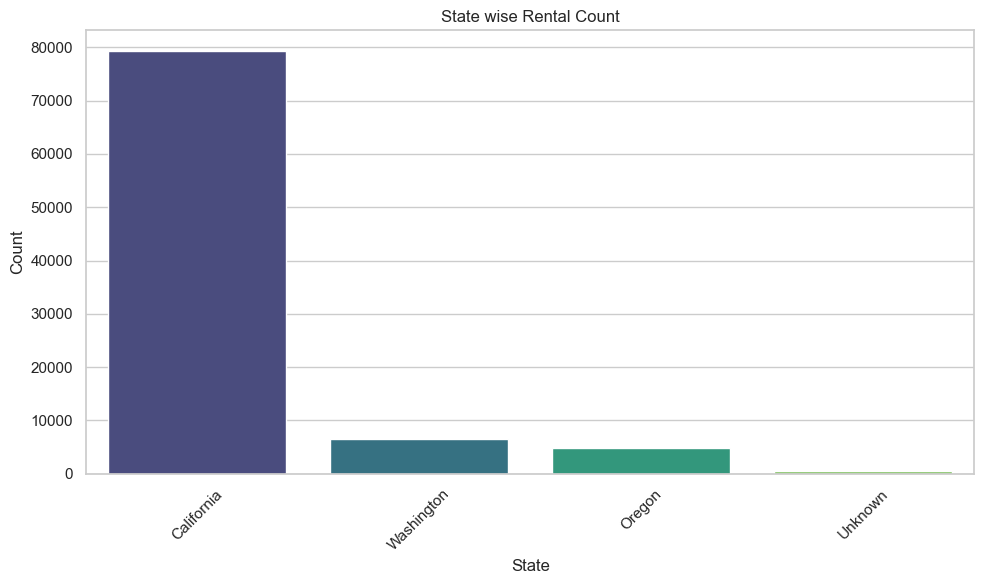

In [ ]:
top10_states = df['State'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 States
filtered_df = df[df['State'].isin(top10_states)]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='State', order=top10_states, palette="viridis")
plt.xticks(rotation=45)  # Rotate city names for readability
plt.title("State wise Rental Count")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2457295829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='property_type', order=top10_ptype, palette="viridis")


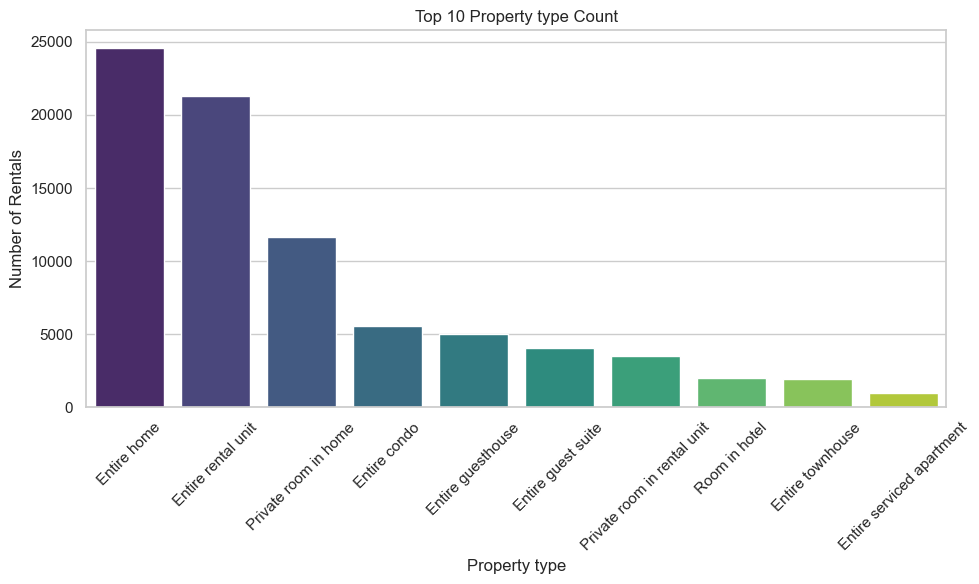

In [ ]:
top10_ptype = df['property_type'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 property types
filtered_df = df[df['property_type'].isin(top10_ptype)]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='property_type', order=top10_ptype, palette="viridis")
plt.xticks(rotation=45)  # Rotate city names for readability
plt.title("Top 10 Property type Count")
plt.xlabel("Property type")
plt.ylabel("Number of Rentals")
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\3822091313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='neighbourhood_cleansed', order=top10_nb, palette="viridis")


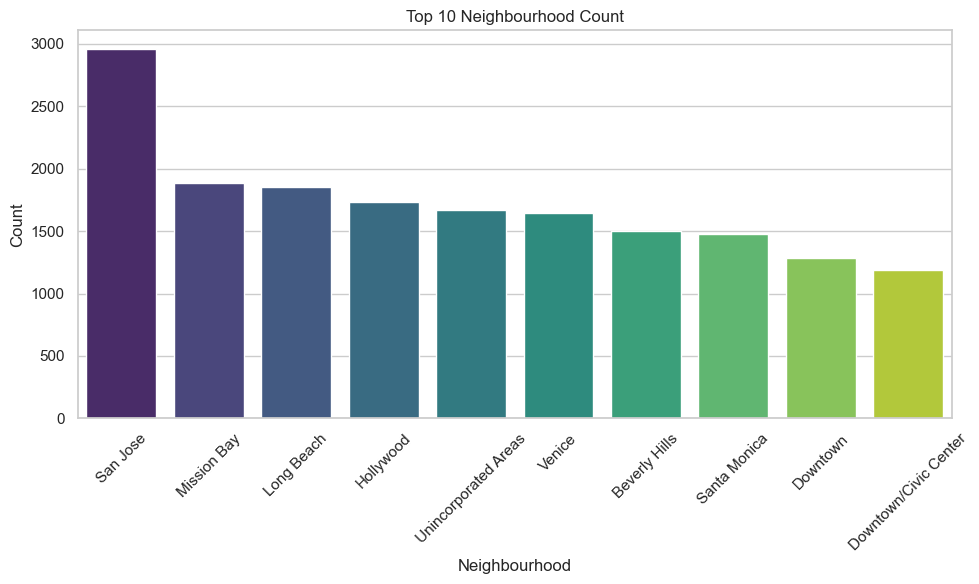

In [ ]:
top10_nb = df['neighbourhood_cleansed'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 Neighbourhoods.
filtered_df = df[df['neighbourhood_cleansed'].isin(top10_nb)]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='neighbourhood_cleansed', order=top10_nb, palette="viridis")
plt.xticks(rotation=45)  # Rotate city names for readability
plt.title("Top 10 Neighbourhood Count")
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\1427318488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='host_name', order=top10_host, palette="viridis")


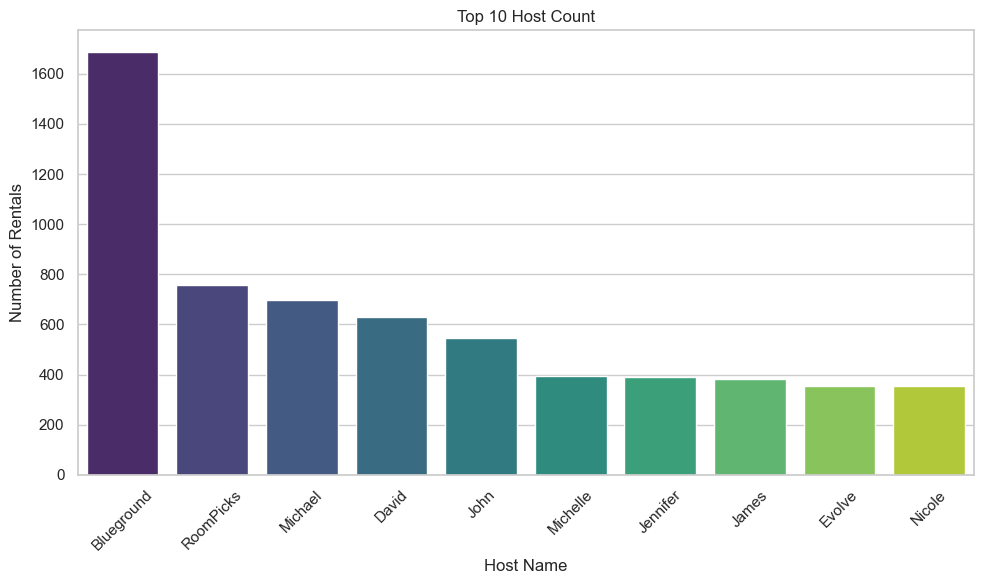

In [ ]:
top10_host = df['host_name'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 host by count.
filtered_df = df[df['host_name'].isin(top10_host)]

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='host_name', order=top10_host, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Host Count")
plt.xlabel("Host Name")
plt.ylabel("Number of Rentals")
plt.tight_layout()
plt.show()

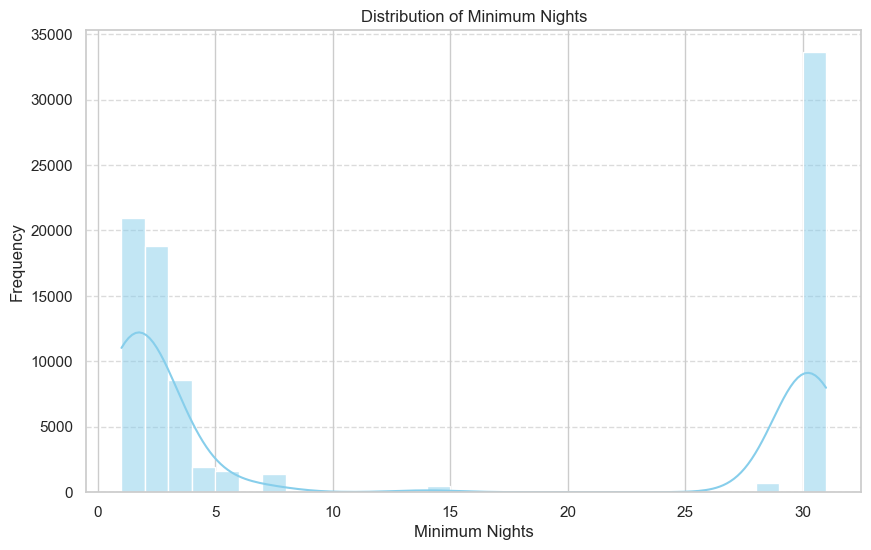

In [ ]:
top10_min_nights = df['minimum_nights'].value_counts().nlargest(10).index
filtered_df = df[df['minimum_nights'].isin(top10_min_nights)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['minimum_nights'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

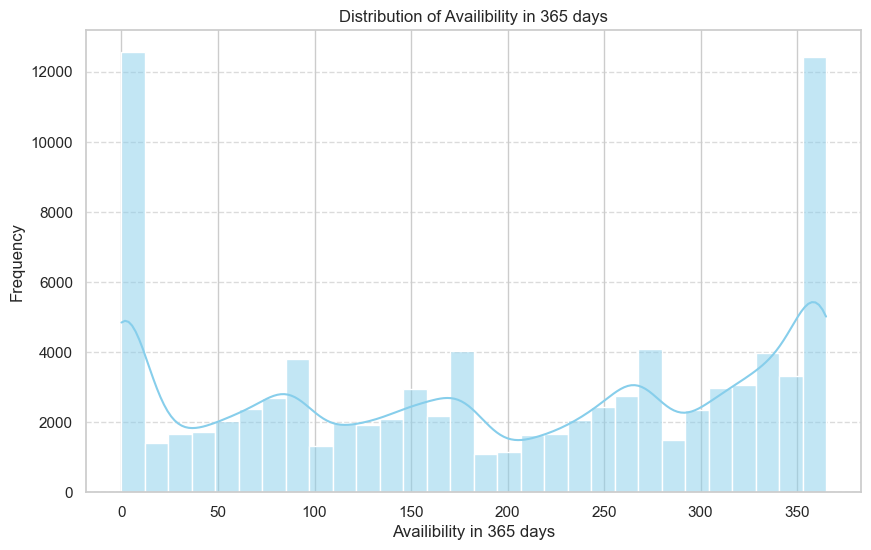

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Availibility in 365 days')
plt.xlabel('Availibility in 365 days')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

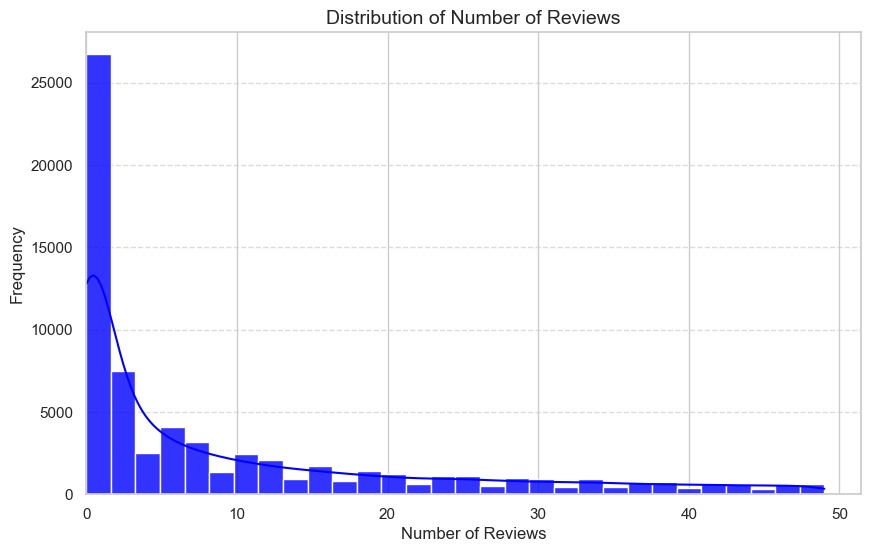

Plot saved successfully to D:/MSDA_SJSU/Data 230/Project/Review_distribution.png


In [ ]:
# Filter for top 50 listings based on the number of reviews
top10_rev = df['number_of_reviews'].value_counts().nlargest(50).index
filtered_df = df[df['number_of_reviews'].isin(top10_rev)]

# Plot the distribution of the number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['number_of_reviews'], bins=30, kde=True, color='blue', alpha=0.8)
plt.title('Distribution of Number of Reviews', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, None)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot before displaying
plot_path = "D:/MSDA_SJSU/Data 230/Project/Review_distribution.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

print(f"Plot saved successfully to {plot_path}")


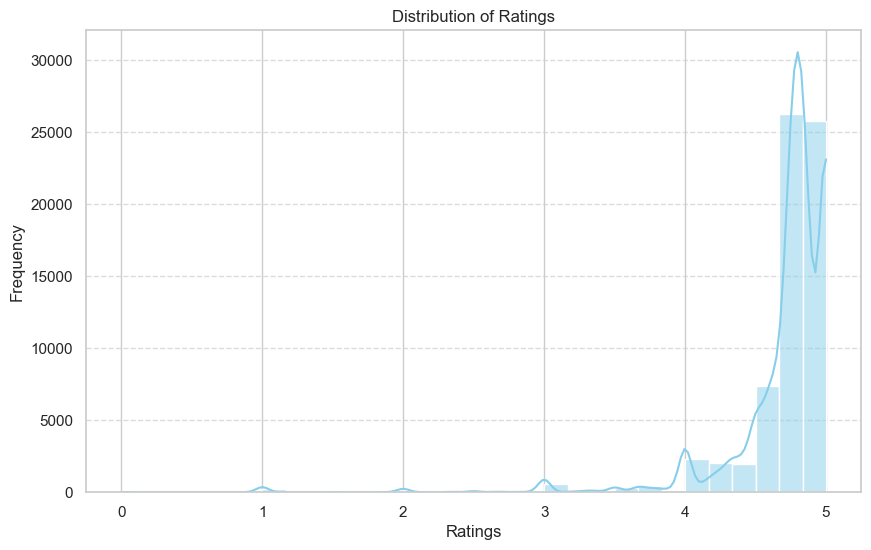

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['review_scores_value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2360019001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hosts, x='host_name', y='host_total_listings_count', palette='viridis')


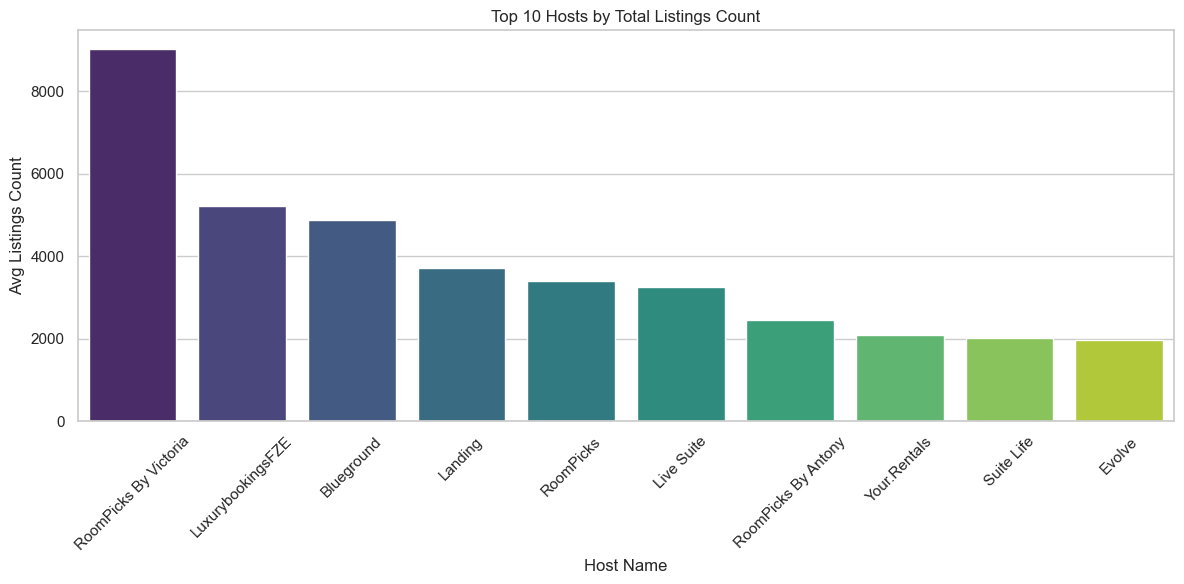

In [ ]:
# Step 1: Aggregate to get the total listings count per host
host_listings = df.groupby('host_name', as_index=False)['host_total_listings_count'].mean()

# Step 2: Get the top 10 hosts by total listings count
top_hosts = host_listings.nlargest(10, 'host_total_listings_count')

# Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_hosts, x='host_name', y='host_total_listings_count', palette='viridis')
plt.title('Top 10 Hosts by Total Listings Count')
plt.xlabel('Host Name')
plt.ylabel('Avg Listings Count')
plt.xticks(rotation=45)  # Rotate host names for readability
plt.tight_layout()
plt.show()

In [ ]:
print(df['price'].dtype)

float64


In [ ]:
# make price numerical
# df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

# df['price']

In [ ]:
df['price'].max()

59000.0

In [ ]:
df['price'].min()

5.0

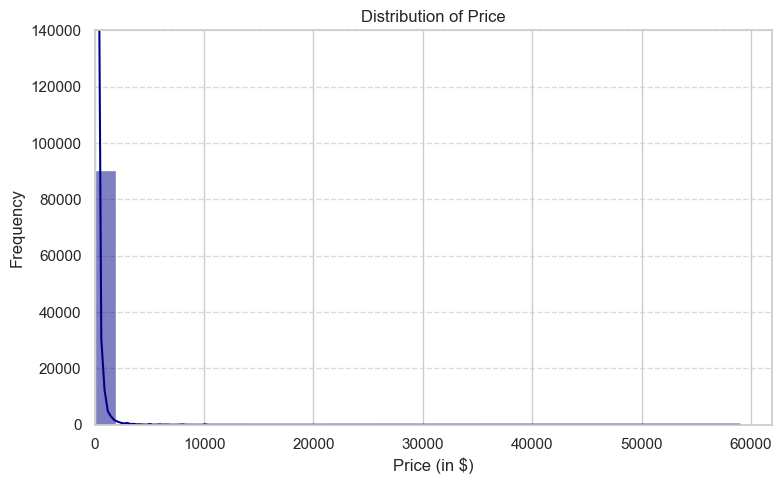

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Price')
plt.xlabel('Price (in $)')
plt.ylabel('Frequency')

# Set y-axis limit to focus on the meaningful part of the distribution
plt.ylim(0, 140000)  # Adjust the range to your data, e.g., max frequency at 5000
plt.xlim(0, None)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.price.describe()

count    91107.000000
mean       254.784566
std        618.415510
min          5.000000
25%         99.000000
50%        157.000000
75%        250.000000
max      59000.000000
Name: price, dtype: float64

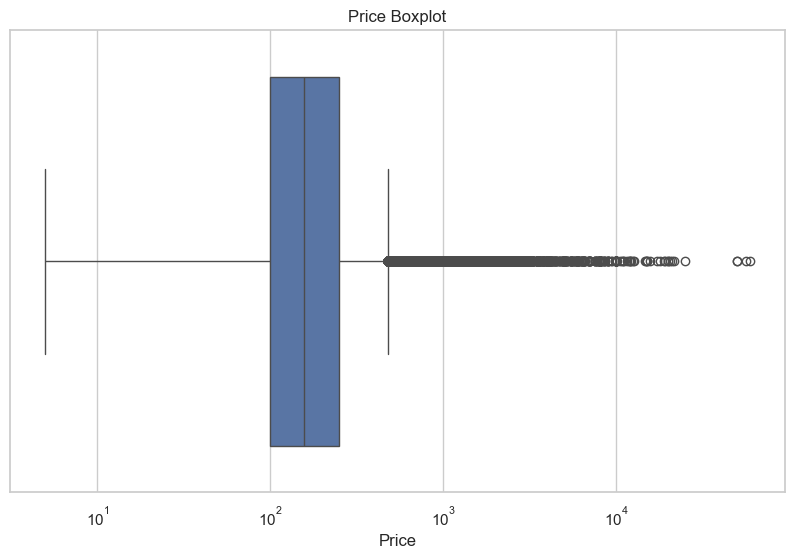

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.xscale('log')
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()

In [ ]:
## Upper limit for Price : to eliminate outliers from Price [Q3+1.5IQR]
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
upper_limit



476.5

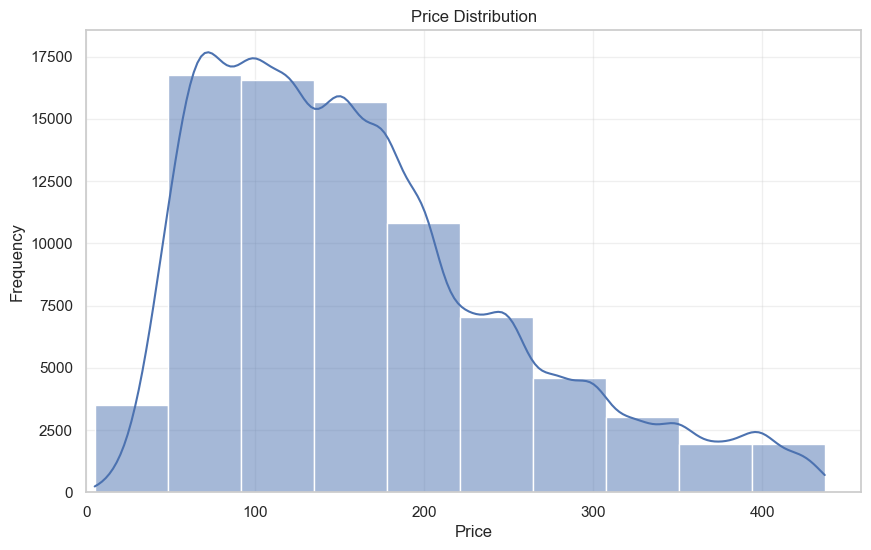

In [ ]:
## Price Distribution after filtering out the Price data beyond the upper limit 437.5

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for price values between 0 and 5000
filtered_data = df[df['price'].between(0, 437.5)]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], bins=10, kde=True)
plt.title('Price Distribution')
#plt.yscale('log')
plt.xlabel('Price')
plt.grid(alpha=0.3)
plt.xlim(0, None)
plt.ylabel('Frequency')
plt.show()


In [ ]:
from scipy.stats import skew

# Calculate the skewness
price_skewness = skew(filtered_data['price'])
print(f"Skewness of Price Distribution : {price_skewness}")

Skewness of Price Distribution : 0.8881490603789363


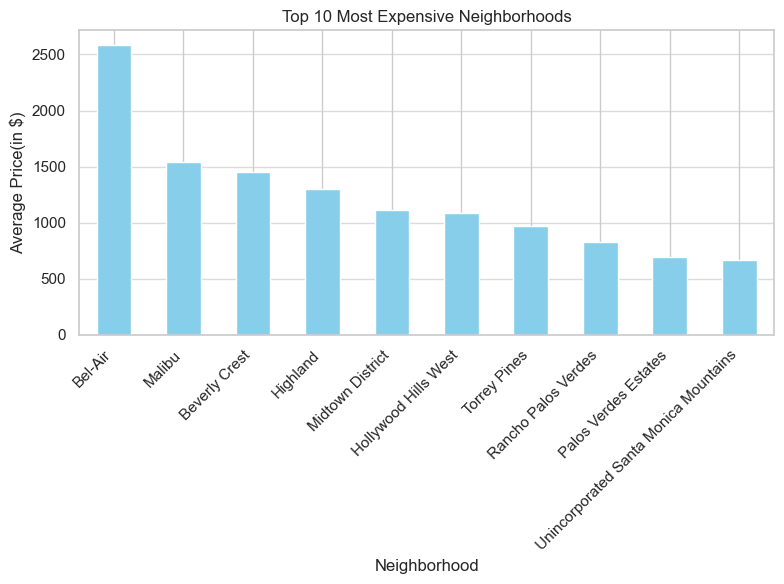

In [ ]:
mean_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

top_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_10_expensive_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price(in $)')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

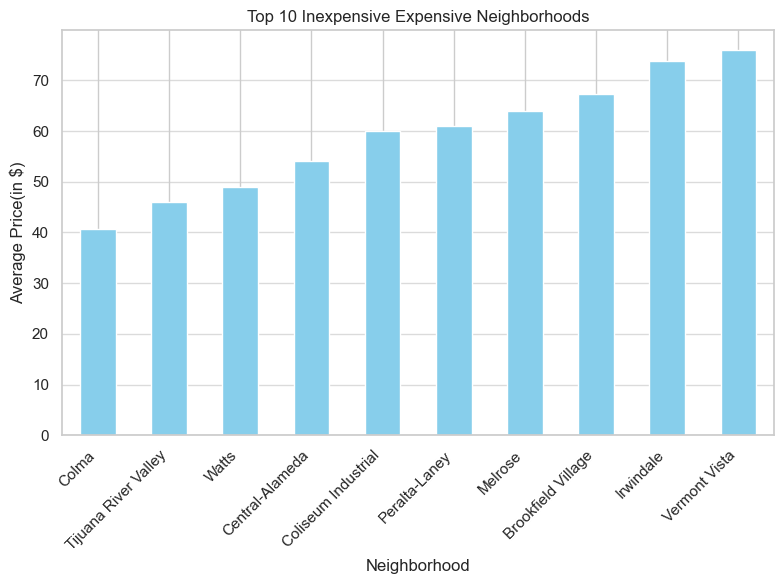

In [ ]:
top_10_inexpensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=True).head(10)

plt.figure(figsize=(8, 6))
top_10_inexpensive_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Inexpensive Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price(in $)')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

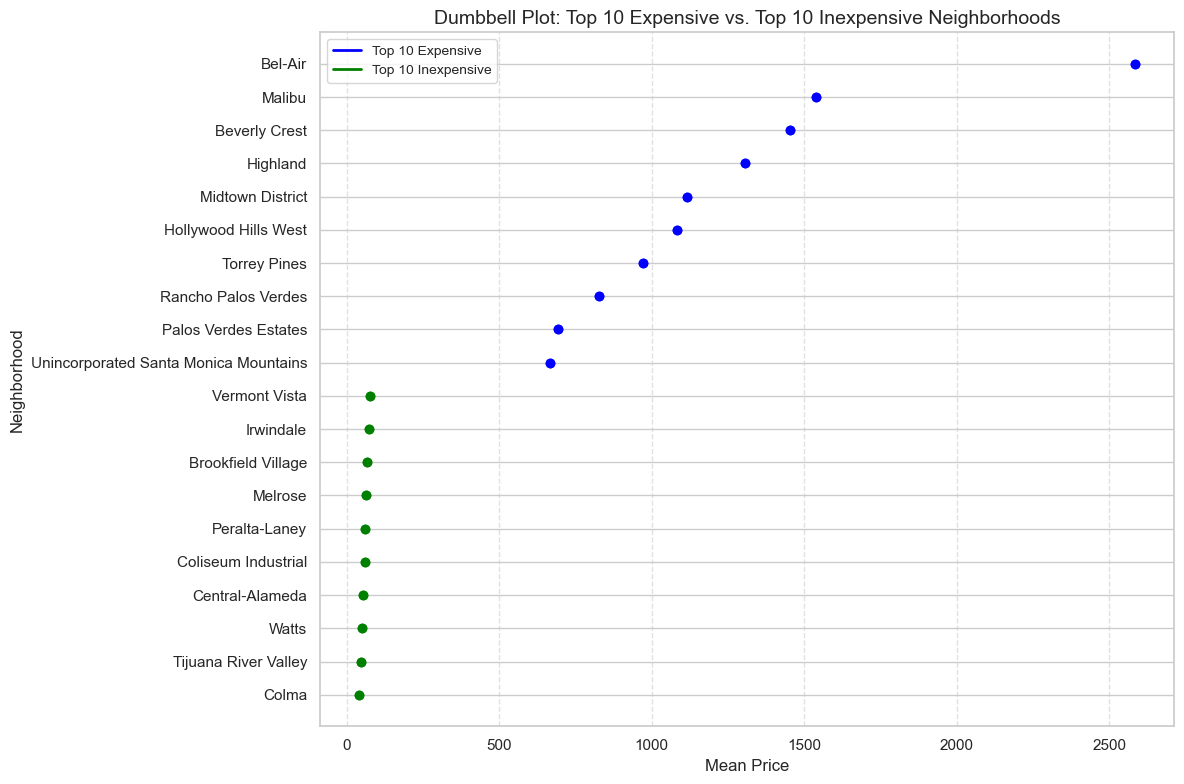

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Compute mean price by neighborhood
mean_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

# Extract top 10 expensive and inexpensive neighborhoods
top_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=False).head(10)
top_10_inexpensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=True).head(10)

# Combine the top and bottom neighborhoods
combined_neighborhoods = pd.concat([top_10_expensive_neighborhoods, top_10_inexpensive_neighborhoods])
categories = ['Top 10 Expensive'] * 10 + ['Top 10 Inexpensive'] * 10

# Prepare data for plotting
dumbbell_data = pd.DataFrame({
    'Neighborhood': combined_neighborhoods.index,
    'Price': combined_neighborhoods.values,
    'Category': categories
}).sort_values('Price', ascending=True)

# Create the Dumbbell Plot
plt.figure(figsize=(12, 8))
for _, row in dumbbell_data.iterrows():
    if row['Category'] == 'Top 10 Expensive':
        plt.plot([row['Price'], row['Price']], [row['Neighborhood'], row['Neighborhood']], color='blue', marker='o', markersize=6)
    else:
        plt.plot([row['Price'], row['Price']], [row['Neighborhood'], row['Neighborhood']], color='green', marker='o', markersize=6)

# Add annotations
plt.title('Dumbbell Plot: Top 10 Expensive vs. Top 10 Inexpensive Neighborhoods', fontsize=14)
plt.xlabel('Mean Price', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Add legend
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, label='Top 10 Expensive'),
    Line2D([0], [0], color='green', lw=2, label='Top 10 Inexpensive')
]
plt.legend(handles=custom_lines, loc='upper left', fontsize=10)

plt.show()


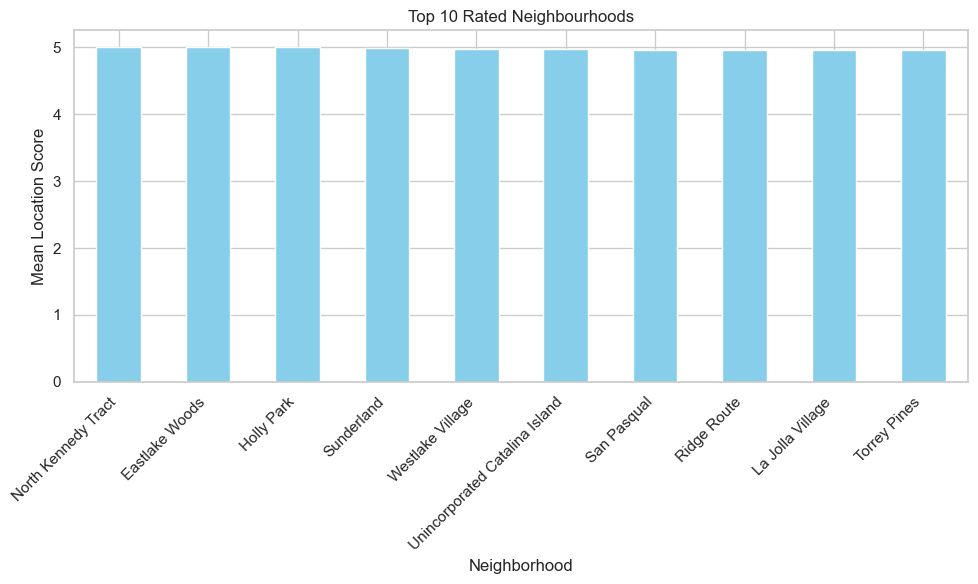

In [ ]:
mean_rating_by_neighborhood = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean()

# mean_rating_by_neighborhood = df.groupby('City')['review_scores_location'].mean()

top_10_rated_neighborhoods = mean_rating_by_neighborhood.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_rated_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Rated Neighbourhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Location Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

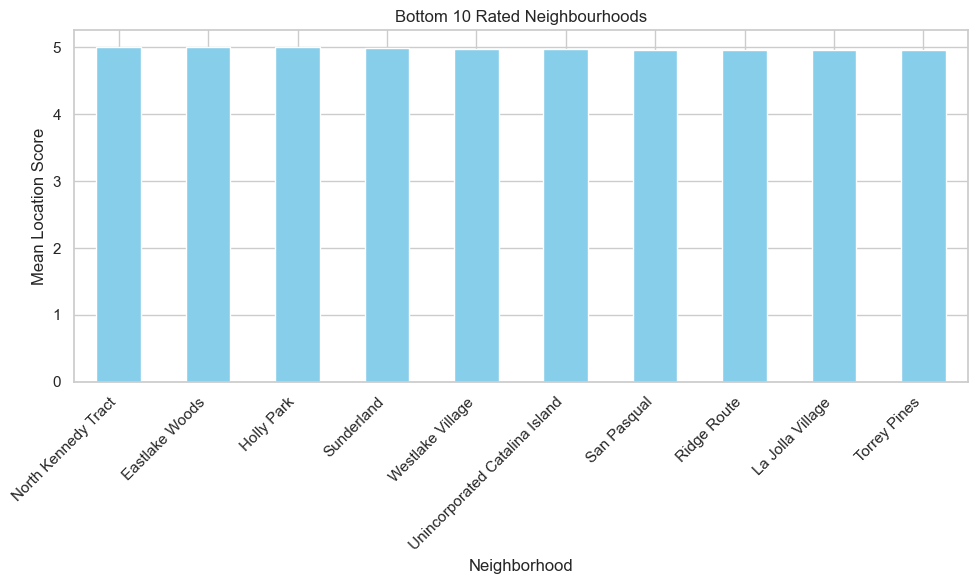

In [ ]:
bottom_10_rated_neighborhoods = mean_rating_by_neighborhood.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
top_10_rated_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Bottom 10 Rated Neighbourhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Location Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\287122868.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_host_listings = filtered_df.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['calculated_host_listings_count'].mean().reset_index()


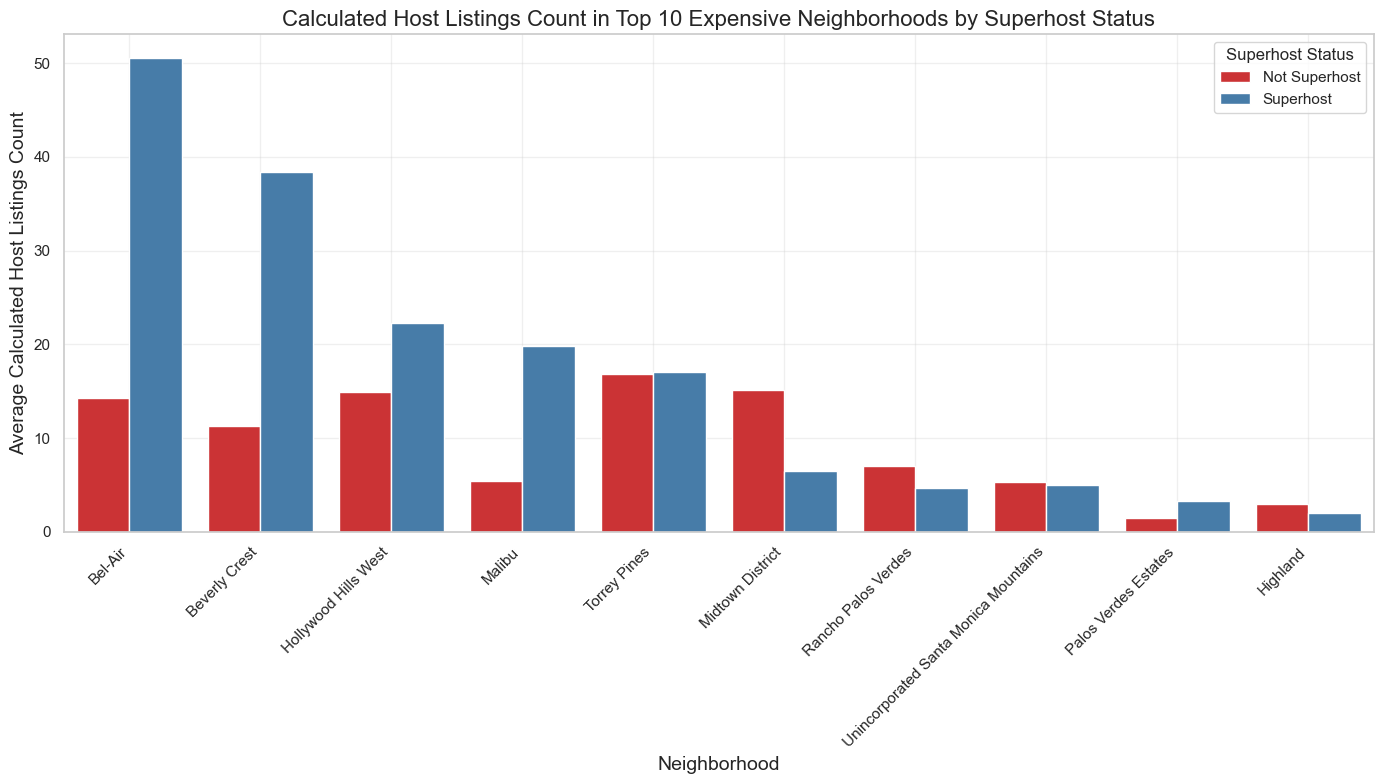

In [ ]:
### Host status wise listing in expensive area:

# Step 1: Calculate top 10 expensive neighborhoods based on mean price
mean_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()
top_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=False).head(10).index

# Step 2: Filter the DataFrame to include only listings in the top 10 expensive neighborhoods
filtered_df = df[df['neighbourhood_cleansed'].isin(top_10_expensive_neighborhoods)].copy()

# Step 3: Set host_is_superhost to categorical
filtered_df['host_is_superhost'] = filtered_df['host_is_superhost'].replace({'t': 'Superhost', 'f': 'Not Superhost'}).astype('category')

# Step 4: Calculate the mean of calculated_host_listings_count grouped by neighborhood and Superhost status
mean_host_listings = filtered_df.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['calculated_host_listings_count'].mean().reset_index()

# Step 5: Sort the results by calculated_host_listings_count in descending order
mean_host_listings = mean_host_listings.sort_values(by='calculated_host_listings_count', ascending=False)

# Step 6: Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_host_listings, x='neighbourhood_cleansed', y='calculated_host_listings_count', hue='host_is_superhost', palette='Set1')

# Step 7: Formatting the plot
plt.title('Calculated Host Listings Count in Top 10 Expensive Neighborhoods by Superhost Status', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Calculated Host Listings Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Superhost Status')
plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\624957825.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_host_listings = filtered_df.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['calculated_host_listings_count'].mean().reset_index()


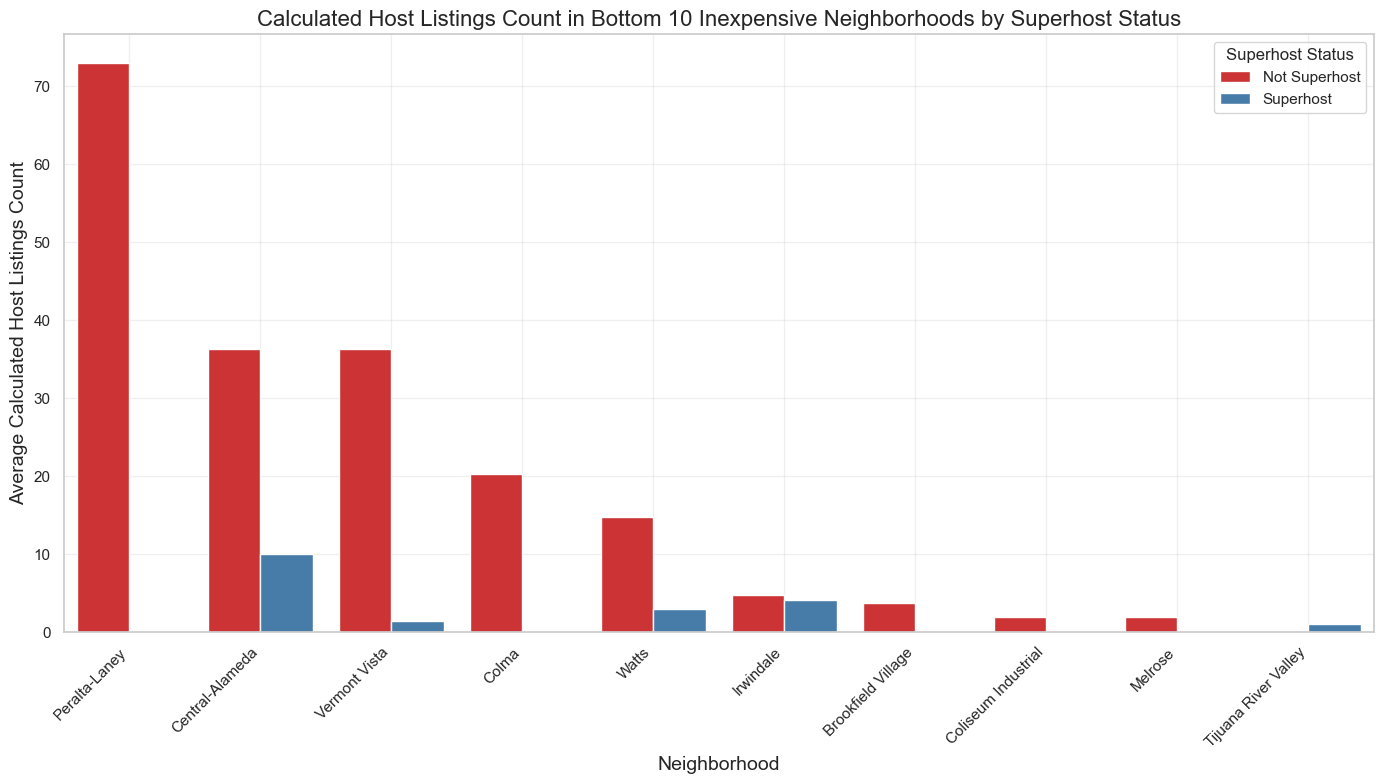

In [ ]:
# Step 1: Calculate bottom 10 expensive neighborhoods based on mean price
mean_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()
bottom_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=True).head(10).index

# Step 2: Filter the DataFrame to include only listings in the top 10 expensive neighborhoods
filtered_df = df[df['neighbourhood_cleansed'].isin(bottom_10_expensive_neighborhoods)].copy()

# Step 3: Set host_is_superhost to categorical
filtered_df['host_is_superhost'] = filtered_df['host_is_superhost'].replace({'t': 'Superhost', 'f': 'Not Superhost'}).astype('category')

# Step 4: Calculate the mean of calculated_host_listings_count grouped by neighborhood and Superhost status
mean_host_listings = filtered_df.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['calculated_host_listings_count'].mean().reset_index()

# Step 5: Sort the results by calculated_host_listings_count in descending order
mean_host_listings = mean_host_listings.sort_values(by='calculated_host_listings_count', ascending=False)

# Step 6: Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_host_listings, x='neighbourhood_cleansed', y='calculated_host_listings_count', hue='host_is_superhost', palette='Set1')

# Step 7: Formatting the plot
plt.title('Calculated Host Listings Count in Bottom 10 Inexpensive Neighborhoods by Superhost Status', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Calculated Host Listings Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Superhost Status')
plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\1898503786.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 'Superhost', 'f': 'Not Superhost'})


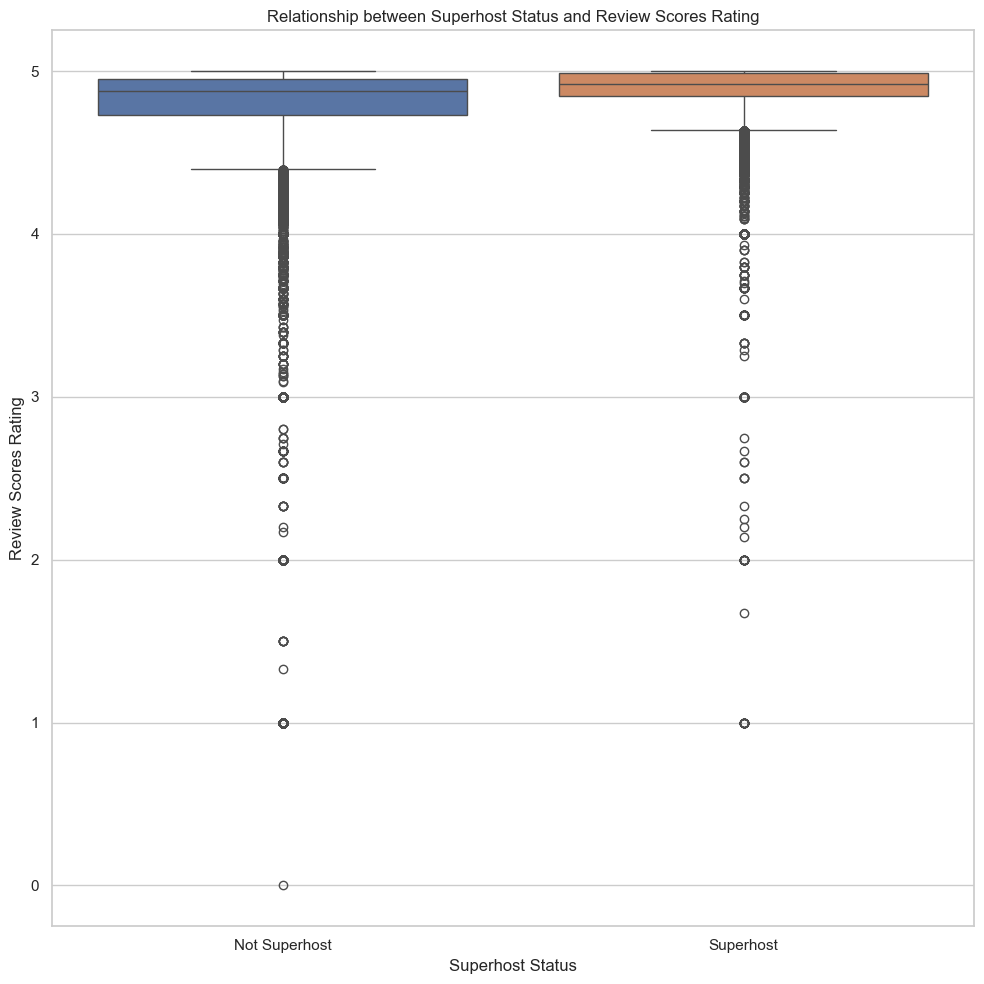

In [ ]:
df['host_is_superhost'] = df['host_is_superhost'].astype('category')
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 'Superhost', 'f': 'Not Superhost'})

# Plotting using a box plot
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='host_is_superhost', y='review_scores_rating', hue='host_is_superhost')
plt.title('Relationship between Superhost Status and Review Scores Rating')
plt.xlabel('Superhost Status')
plt.ylabel('Review Scores Rating')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [ ]:
df.host_is_superhost.value_counts()

host_is_superhost
Not Superhost    53190
Superhost        37917
Name: count, dtype: int64

In [ ]:
df[['host_is_superhost','accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]

host_is_superhost  accommodates  bathrooms  bedrooms  beds  price
0         Not Superhost             2        1.0       1.0   1.0  257.0
1             Superhost             3        1.0       2.0   1.0   71.0
2             Superhost             3        1.0       1.0   1.0  132.0
3             Superhost             2        1.0       1.0   1.0  100.0
4         Not Superhost             4        1.0       1.0   2.0  189.5
...                 ...           ...        ...       ...   ...    ...
91102         Superhost            12        4.0       6.0   6.0  481.0
91103     Not Superhost             2        1.0       1.0   1.0   82.0
91104     Not Superhost             4        1.5       2.0   2.0  222.0
91105     Not Superhost             2        3.0       1.0   1.0   40.0
91106         Superhost             6        2.0       2.0   3.0  432.0

[91107 rows x 6 columns]

In [ ]:
df['bathrooms'].unique()

array([ 1. ,  0. ,  1.5,  2. ,  3. ,  4.5,  2.5, 10. ,  0.5,  3.5,  4. ,
        5. ,  5.5,  8. ,  6. ,  7. ,  7.5,  6.5, 10.5, 12. , 11. , 11.5,
       13. ,  9.5,  8.5,  9. , 13.5, 21. , 16. , 24. , 50. , 12.5, 19. ,
       23. ])

In [ ]:
df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2829348725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='host_is_superhost', y=col, ax=axes[i], palette='Set2')
C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2829348725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='host_is_superhost', y=col, ax=axes[i], palette='Set2')
C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2829348725.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='host_is_superhost', y=col, ax=axes[i], palette='Set2'

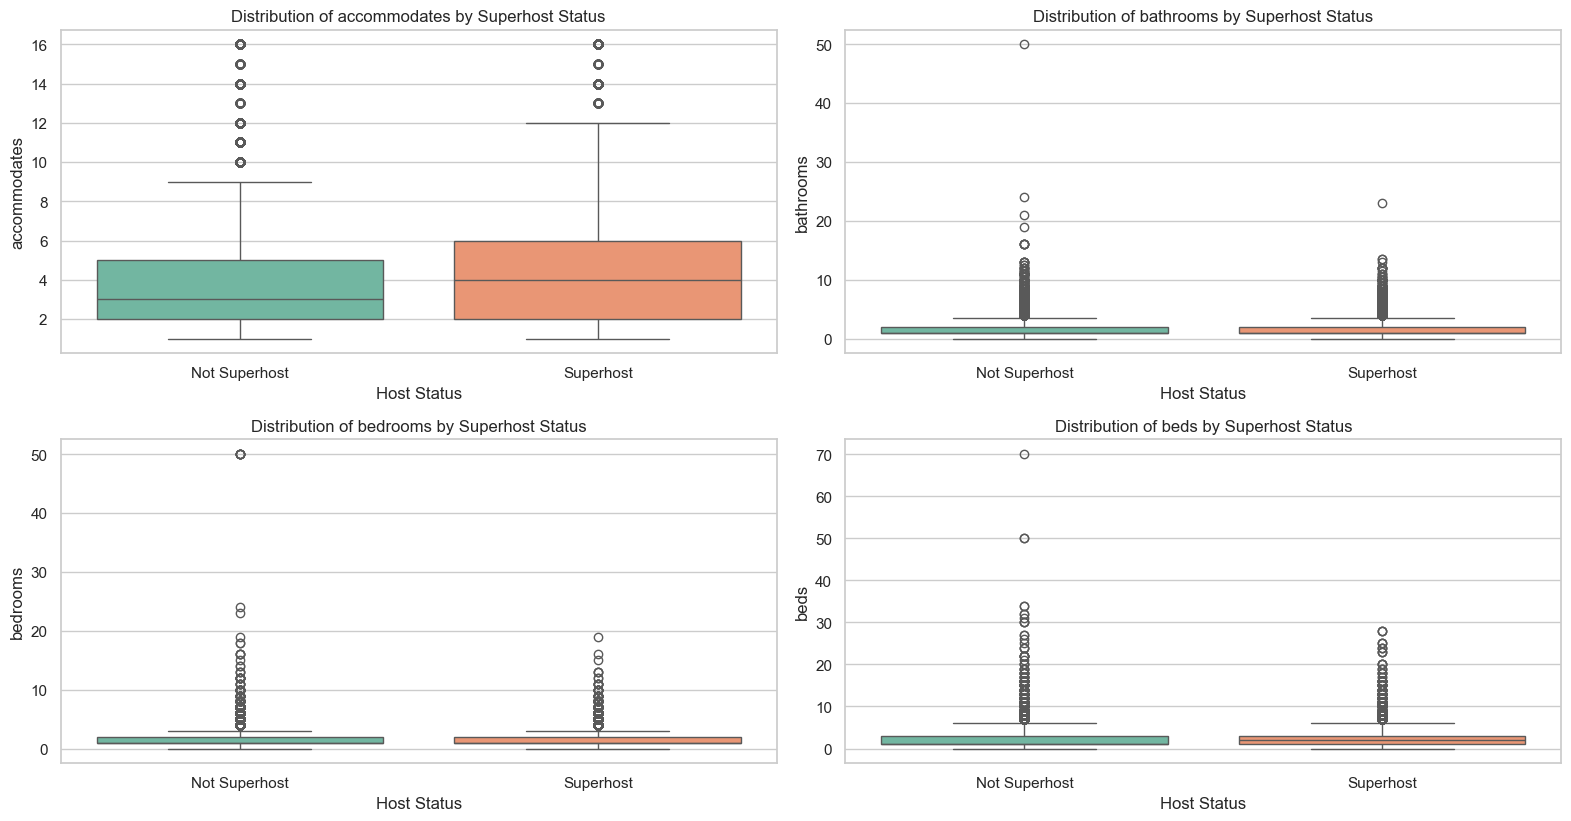

In [ ]:

# List of columns to plot
columns_to_plot = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array to easily access the subplots
axes = axes.flatten()

# Loop through each column and create a boxplot for superhost comparison
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x='host_is_superhost', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution of {col} by Superhost Status")
    axes[i].set_xlabel("Host Status")
    axes[i].set_ylabel(col)

# Remove any empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


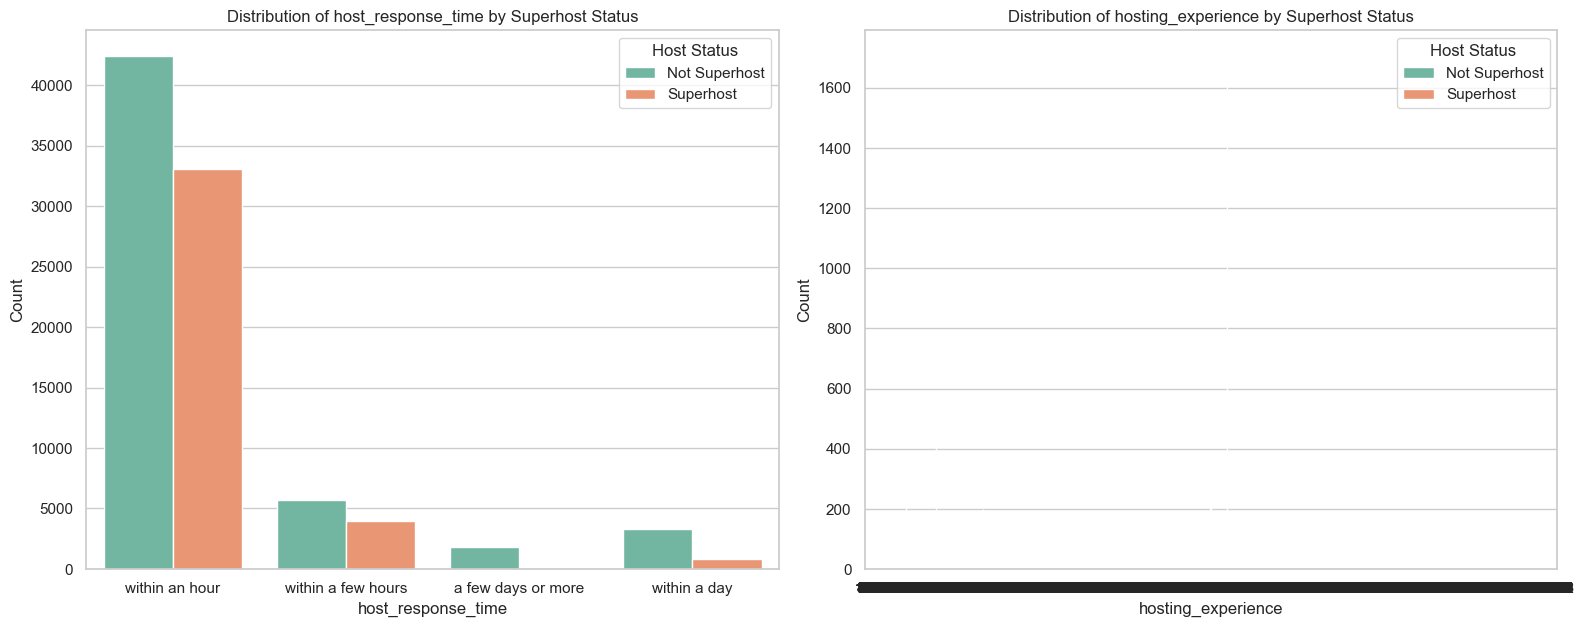

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = ['host_response_time','hosting_experience']


# Set the plot style
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array to easily access the subplots
axes = axes.flatten()

# Loop through each column and create a countplot for superhost comparison
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, hue='host_is_superhost', ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution of {col} by Superhost Status")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Host Status", loc='upper right')

# Remove any empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',

In [ ]:
df[['host_is_superhost','host_response_rate','host_acceptance_rate','review_scores_rating','number_of_reviews']]

host_is_superhost host_response_rate host_acceptance_rate  \
0         Not Superhost               100%                 100%   
1             Superhost               100%                  94%   
2             Superhost               100%                  75%   
3             Superhost               100%                  75%   
4         Not Superhost               100%                 100%   
...                 ...                ...                  ...   
91102         Superhost               100%                  99%   
91103     Not Superhost               100%                  99%   
91104     Not Superhost               100%                 100%   
91105     Not Superhost                72%                 100%   
91106         Superhost               100%                  99%   

       review_scores_rating  number_of_reviews  
0                      5.00                  1  
1                      4.62                 21  
2                      4.80                 15  
3                      4.87                 39  
4                      5.00                  9  
...                     ...                ...  
91102                  4.92                  0  
91103                  4.90                  0  
91104                  4.92                  0  
91105                  4.90                  0  
91106                  4.86                  0  

[91107 rows x 5 columns]

In [ ]:
## host acceptance / response rate

superhost_stats = df.groupby('host_is_superhost').agg({
#    'host_response_rate': 'mode',
 #   'host_acceptance_rate': 'mode',
    'review_scores_rating': 'mean',
    'number_of_reviews': 'mean'
})

superhost_stats

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\1280755278.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  superhost_stats = df.groupby('host_is_superhost').agg({


review_scores_rating  number_of_reviews
host_is_superhost                                         
Not Superhost                  4.765791          26.081594
Superhost                      4.880489          83.037266

In [ ]:
# Ensure the year-round occupancy rate is calculated
df['year_round_occupancy_rate'] = ((365 - df['availability_365']) / 365) * 100

df['month_round_occupancy_rate'] = ((30 - df['availability_30']) / 30) * 100

# Calculate revenue per listing
df['revenue_per_rental'] = (df['year_round_occupancy_rate'] / 100) * df['price']

# Calculate revenue per listing
df['monthly_revenue_per_rental'] = (df['month_round_occupancy_rate'] / 100) * df['price']

In [ ]:
df[['host_listings_count','host_total_listings_count','revenue_per_rental','monthly_revenue_per_rental']]

host_listings_count  host_total_listings_count  revenue_per_rental  \
0                      1.0                        4.0          257.000000   
1                      3.0                        3.0           71.000000   
2                      2.0                        3.0          128.383562   
3                      2.0                        3.0          100.000000   
4                      1.0                        2.0          189.500000   
...                    ...                        ...                 ...   
91102                130.0                      134.0           54.030137   
91103                  4.0                        5.0           76.158904   
91104                  1.0                        1.0          117.994521   
91105                  6.0                       18.0           11.506849   
91106                 30.0                       31.0          252.098630   

       monthly_revenue_per_rental  
0                      257.000000  
1                       71.000000  
2                      132.000000  
3                      100.000000  
4                      189.500000  
...                           ...  
91102                  481.000000  
91103                   32.800000  
91104                   44.400000  
91105                   13.333333  
91106                  244.800000  

[91107 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91107 entries, 0 to 91106
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url_present                           91107 non-null  int64         
 1   name                                          91107 non-null  object        
 2   description                                   91107 non-null  object        
 3   picture_url_present                           91107 non-null  int64         
 4   host_url_present                              91107 non-null  int64         
 5   host_name                                     91107 non-null  object        
 6   host_since                                    91107 non-null  datetime64[ns]
 7   host_response_time                            91107 non-null  object        
 8   host_response_rate                            91107 non-null  obje

In [ ]:
#count of records with State='Unknown'
df[df['State'] == 'Unknown'].shape

(596, 72)

In [ ]:
df_filter=df[df['State'] != 'Unknown'].copy()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\3181866493.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby(['host_is_superhost','State'])['revenue_per_rental']


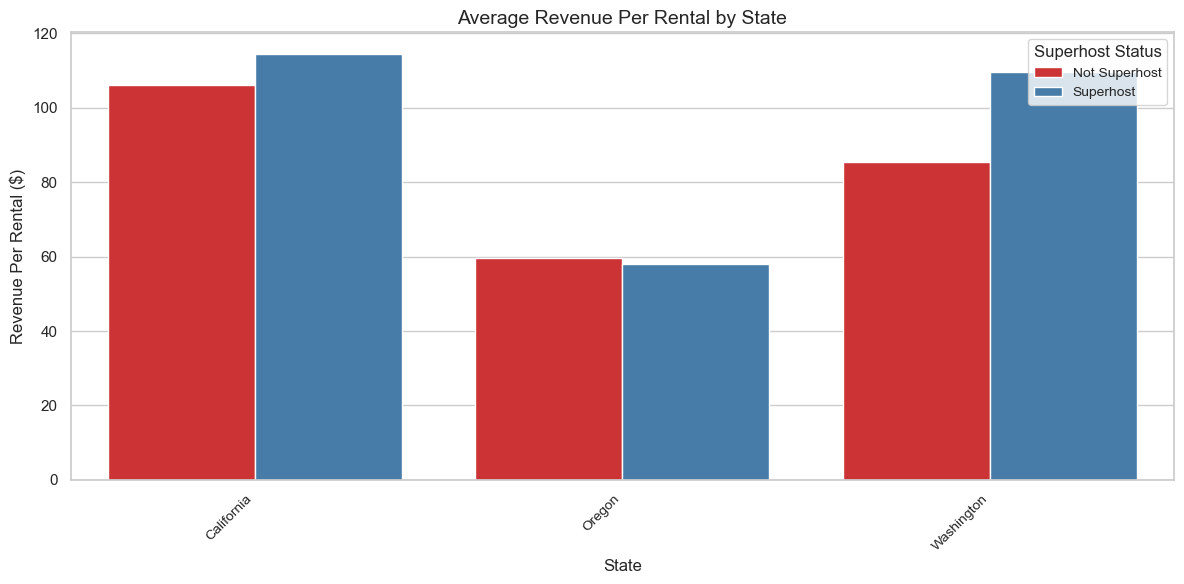

In [ ]:

# Calculate revenue per listing
#df['revenue_per_listing'] = (df['year_round_occupancy_rate'] / 100) * df['price'] * 365

# Summarize revenue by property type and superhost status
revenue_summary = (
#    df.groupby(['host_is_superhost', 'property_type'])['revenue_per_listing']
     df_filter.groupby(['host_is_superhost','State'])['revenue_per_rental']
    .mean()
    .reset_index()
)

# Convert 'host_is_superhost' to categorical for better plot labels
#revenue_summary['host_is_superhost'] = revenue_summary['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Display the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenue_summary,
    x='State',
    y='revenue_per_rental',
    hue='host_is_superhost',
    palette='Set1'
)

# Add a legend with labels
plt.legend(title='Superhost Status', loc='upper right', fontsize=10)

# Add titles and axis labels
plt.title('Average Revenue Per Rental by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Revenue Per Rental ($)', fontsize=12)

# Customize x-axis ticks for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Final adjustments for layout
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\2228196802.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby(['host_is_superhost','State'])['monthly_revenue_per_rental']


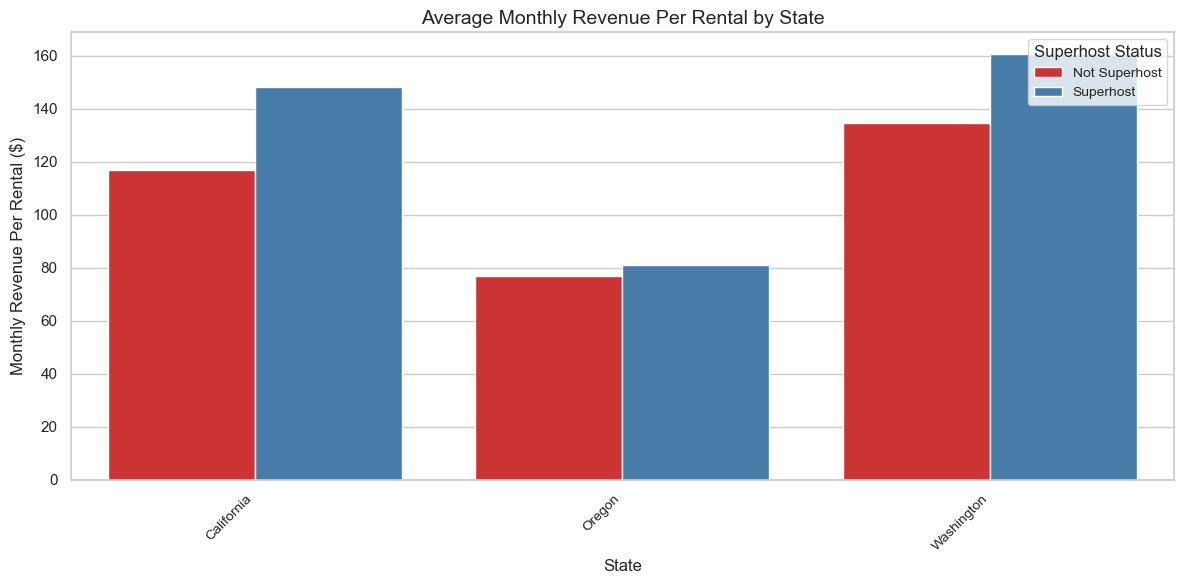

In [ ]:



# Calculate revenue per listing
#df['revenue_per_listing'] = (df['year_round_occupancy_rate'] / 100) * df['price'] * 365

# Summarize revenue by property type and superhost status
revenue_summary = (
#    df.groupby(['host_is_superhost', 'property_type'])['revenue_per_listing']
     df_filter.groupby(['host_is_superhost','State'])['monthly_revenue_per_rental']
    .mean()
    .reset_index()
)

# Convert 'host_is_superhost' to categorical for better plot labels
#revenue_summary['host_is_superhost'] = revenue_summary['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Display the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenue_summary,
    x='State',
    y='monthly_revenue_per_rental',
    hue='host_is_superhost',
    palette='Set1'
)

# Add a legend with labels
plt.legend(title='Superhost Status', loc='upper right', fontsize=10)

# Add titles and axis labels
plt.title('Average Monthly Revenue Per Rental by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Monthly Revenue Per Rental ($)', fontsize=12)

# Customize x-axis ticks for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Final adjustments for layout
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\654678907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby(['host_is_superhost','State','City'])['revenue_per_rental']


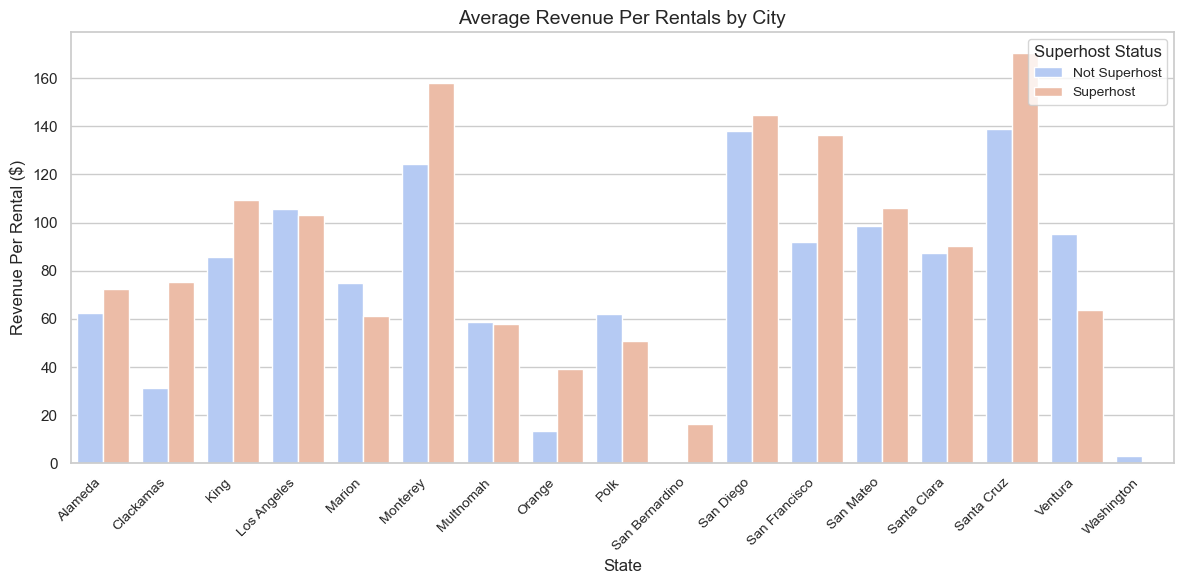

In [ ]:

# Calculate revenue per listing
#df['revenue_per_listing'] = (df['year_round_occupancy_rate'] / 100) * df['price'] * 365

# Summarize revenue by property type and superhost status
revenue_summary = (
#    df.groupby(['host_is_superhost', 'property_type'])['revenue_per_listing']
     df_filter.groupby(['host_is_superhost','State','City'])['revenue_per_rental']
    .mean()
    .reset_index()
)

# Convert 'host_is_superhost' to categorical for better plot labels
#revenue_summary['host_is_superhost'] = revenue_summary['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Display the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenue_summary,
    x='City',
    y='revenue_per_rental',
    hue='host_is_superhost',
    palette='coolwarm'
)

# Add a legend with labels
plt.legend(title='Superhost Status', loc='upper right', fontsize=10)

# Add titles and axis labels
plt.title('Average Revenue Per Rentals by City', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Revenue Per Rental ($)', fontsize=12)

# Customize x-axis ticks for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Final adjustments for layout
plt.tight_layout()
plt.show()

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\3331783848.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby(['host_is_superhost','State','City'])['monthly_revenue_per_rental']


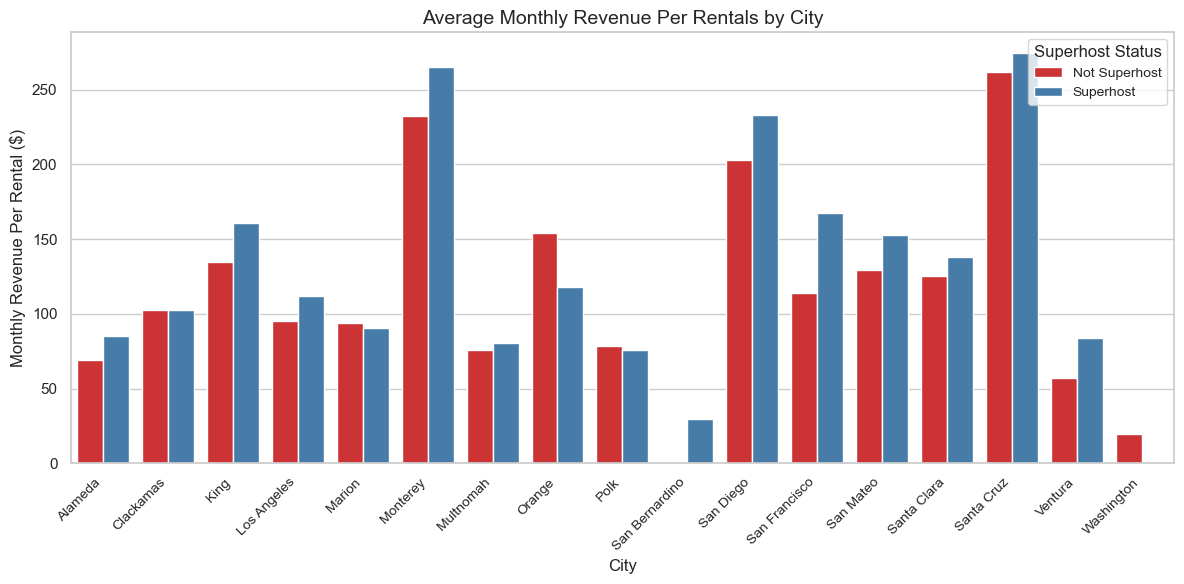

In [ ]:

# Calculate revenue per listing
#df['revenue_per_listing'] = (df['year_round_occupancy_rate'] / 100) * df['price'] * 365

# Summarize revenue by property type and superhost status
revenue_summary = (
#    df.groupby(['host_is_superhost', 'property_type'])['revenue_per_listing']
     df_filter.groupby(['host_is_superhost','State','City'])['monthly_revenue_per_rental']
    .mean()
    .reset_index()
)

# Convert 'host_is_superhost' to categorical for better plot labels
#revenue_summary['host_is_superhost'] = revenue_summary['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Display the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenue_summary,
    x='City',
    y='monthly_revenue_per_rental',
    hue='host_is_superhost',
    palette='Set1'
)

# Add a legend with labels
plt.legend(title='Superhost Status', loc='upper right', fontsize=10)

# Add titles and axis labels
plt.title('Average Monthly Revenue Per Rentals by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Monthly Revenue Per Rental ($)', fontsize=12)

# Customize x-axis ticks for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Final adjustments for layout
plt.tight_layout()
plt.show()

### We will be saving EDA file to local for machine learning model building

In [ ]:
# Specify the filename for the output file
#output_filename = "D:/MSDA_SJSU/Data 230/Project//eda_data_v0.1.csv"

# Save the DataFrame to a CSV file
df.to_csv(output_filename, index=False)

# Provide confirmation of the saved file
output_filename


In [ ]:
## host performance based on review score, price availability
host_performance = df.groupby('host_total_listings_count').agg({
    'review_scores_rating': 'mean',
    'price': 'mean',
    'availability_365': 'mean'
}).reset_index()

host_performance

host_total_listings_count  review_scores_rating       price  \
0                          0.0              4.655000  912.000000   
1                          1.0              4.880141  224.114143   
2                          2.0              4.860939  225.411574   
3                          3.0              4.854257  221.347078   
4                          4.0              4.821580  229.133787   
..                         ...                   ...         ...   
327                     5212.0              4.835258  408.623711   
328                     7941.0              4.758182  196.272727   
329                     8048.0              4.595556   49.166667   
330                     9003.0              4.500000  157.000000   
331                     9019.0              4.666961  592.637255   

     availability_365  
0          269.500000  
1          158.315607  
2          168.703279  
3          174.612071  
4          186.979634  
..                ...  
327        361.293814  
328        237.454545  
329        225.555556  
330        303.000000  
331        292.019608  

[332 rows x 4 columns]

In [ ]:
## Review score analysis
review_categories = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication',
                     'review_scores_checkin', 'review_scores_location', 'review_scores_value']

host_review_scores = df.groupby('host_is_superhost')[review_categories].mean()
host_review_scores

C:\Users\tanmoy\AppData\Local\Temp\2\ipykernel_9660\651551623.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  host_review_scores = df.groupby('host_is_superhost')[review_categories].mean()


review_scores_accuracy  review_scores_cleanliness  \
host_is_superhost                                                      
Not Superhost                    4.800218                   4.751391   
Superhost                        4.892362                   4.863989   

                   review_scores_communication  review_scores_checkin  \
host_is_superhost                                                       
Not Superhost                         4.859484                4.86589   
Superhost                             4.934774                4.92975   

                   review_scores_location  review_scores_value  
host_is_superhost                                               
Not Superhost                    4.811921             4.682367  
Superhost                        4.858597             4.791104

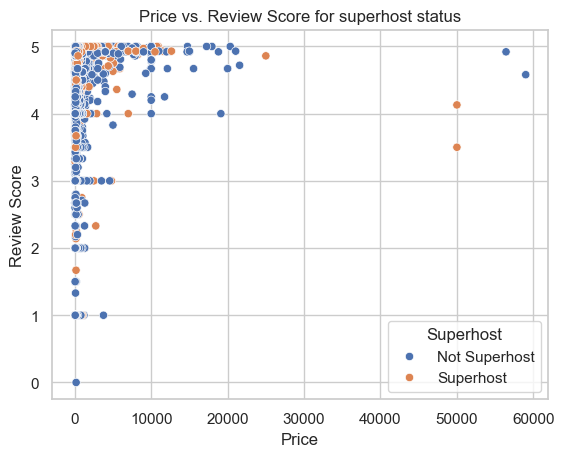

In [ ]:
sns.scatterplot(data=df, x='price', y='review_scores_rating', hue='host_is_superhost')
plt.title("Price vs. Review Score for superhost status")
plt.grid(True)
plt.ylabel("Review Score")
plt.xlabel("Price")
plt.legend(title="Superhost", loc='lower right')
plt.show()

In [ ]:
## Host Availability & Occupancy : Occupancy rate calculation = (1- availability_365/365)

#df['occupancy_rate'] = 1 - (df['availability_365'] / 365)
#occupancy_by_host = df.groupby('host_name')['occupancy_rate'].mean().reset_index()


#df['monthly_occupancy_rate'] = 1 - (df['availability_30'] / 30)
#montly_occupancy_by_host = df.groupby('host_name')['monthly_occupancy_rate'].mean().reset_index()

In [ ]:
df['hosting_experience'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 91107 entries, 0 to 91106
Series name: hosting_experience
Non-Null Count  Dtype
--------------  -----
91107 non-null  int64
dtypes: int64(1)
memory usage: 711.9 KB


In [ ]:
## Long-term vs. Short-term Hosts

#df['host_duration'] = pd.to_datetime('today') - pd.to_datetime(df['host_since'])
#long_term_hosts = df[df['hosting_experience'] > pd.Timedelta(days=365*2)]  # Hosts active for more than 2 years

# Filter for long-term hosts (greater than 2 years)
#long_term_hosts = df[df['hosting_experience'] > pd.Timedelta(days=365 * 2)]

#long_term_hosts = df[df['hosting_experience'] > 2]


In [ ]:
df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',

In [ ]:
## Host Location & Performance

## Host Location & Performance

# Define a custom mode function
def calculate_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

location_performance = df.groupby('City').agg({
    'review_scores_rating': 'mean',
    'price': 'mean',
    'host_response_rate': calculate_mode
})

# Display the result
print(location_performance)


                review_scores_rating       price host_response_rate
City                                                               
Alameda                     4.810525  148.938797               100%
Clackamas                   4.867500  193.250000               100%
King                        4.813441  209.566982               100%
Los Angeles                 4.807405  264.476929               100%
Marion                      4.843815  136.416667               100%
Monterey                    4.850698  356.453488               100%
Multnomah                   4.864156  146.337320               100%
Orange                      4.903333  154.833333               100%
Polk                        4.923333  116.318841               100%
San Bernardino              4.870000  228.500000               100%
San Diego                   4.825008  335.271789               100%
San Francisco               4.797555  217.927540               100%
San Mateo                   4.813045  218.784812

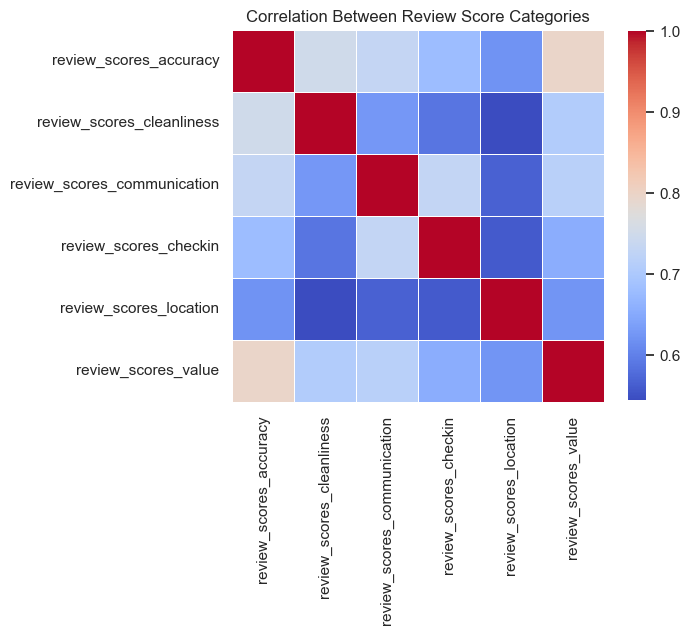

In [ ]:
plt.figure(figsize=(6,6))
corr = df[review_categories].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm",square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Correlation Between Review Score Categories")
plt.show()


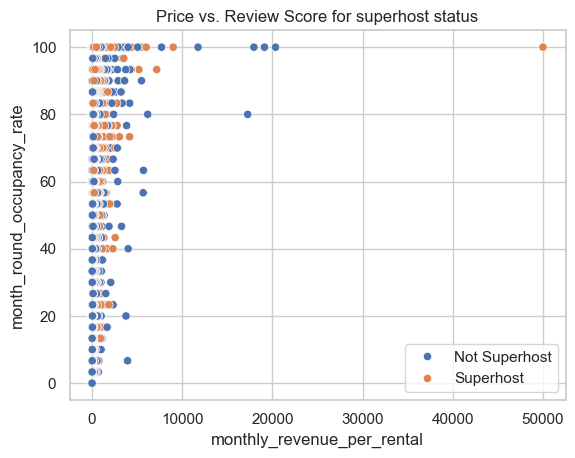

In [ ]:
# Filter out rows with missing occupancy rates and invalid host_is_superhost values
#df_filtered = df[['host_is_superhost', 'monthly_occupancy_rate']]

# Ensure the host_is_superhost column contains only valid mapped values (0 or 1)
#df_filtered = df_filtered[df_filtered['host_is_superhost'].isin([0, 1])]

# Convert superhost status to categorical for better plotting
#df_filtered['host_is_superhost'] = df_filtered['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Plot the relationship between superhost status and occupancy rate
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df_filtered, x='host_is_superhost', y='month_round_occupancy_rate', palette='Set2')

# Adding titles and labels
#plt.title('Occupancy Rate by Superhost Status')
#plt.xlabel('Superhost Status')
#plt.ylabel('Occupancy Rate (%)')

#plt.tight_layout()
#plt.show()


sns.scatterplot(data=df, x='monthly_revenue_per_rental', y='month_round_occupancy_rate', hue='host_is_superhost')
plt.title("Price vs. Review Score for superhost status")
plt.grid(True)
plt.ylabel("month_round_occupancy_rate")
plt.xlabel("monthly_revenue_per_rental")
#plt.legend(title="Superhost", loc='lower right', labels=['Non-Superhost: 0', 'Superhost :1 '])
plt.legend()
plt.show()


In [ ]:
mean_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

top_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=False).head(10)
bottom_10_expensive_neighborhoods = mean_price_by_neighborhood.sort_values(ascending=True).head(10)

In [ ]:
top_10_expensive_neighborhoods

neighbourhood_cleansed
Bel-Air                                  2585.481928
Malibu                                   1539.641791
Beverly Crest                            1451.887324
Highland                                 1304.333333
Midtown District                         1115.980000
Hollywood Hills West                     1084.506211
Torrey Pines                              971.250000
Rancho Palos Verdes                       827.570175
Palos Verdes Estates                      692.590909
Unincorporated Santa Monica Mountains     667.467337
Name: price, dtype: float64

In [ ]:
top_10_expensive_neighborhoods.index.tolist()

['Bel-Air',
 'Malibu',
 'Beverly Crest',
 'Highland',
 'Midtown District',
 'Hollywood Hills West',
 'Torrey Pines',
 'Rancho Palos Verdes',
 'Palos Verdes Estates',
 'Unincorporated Santa Monica Mountains']

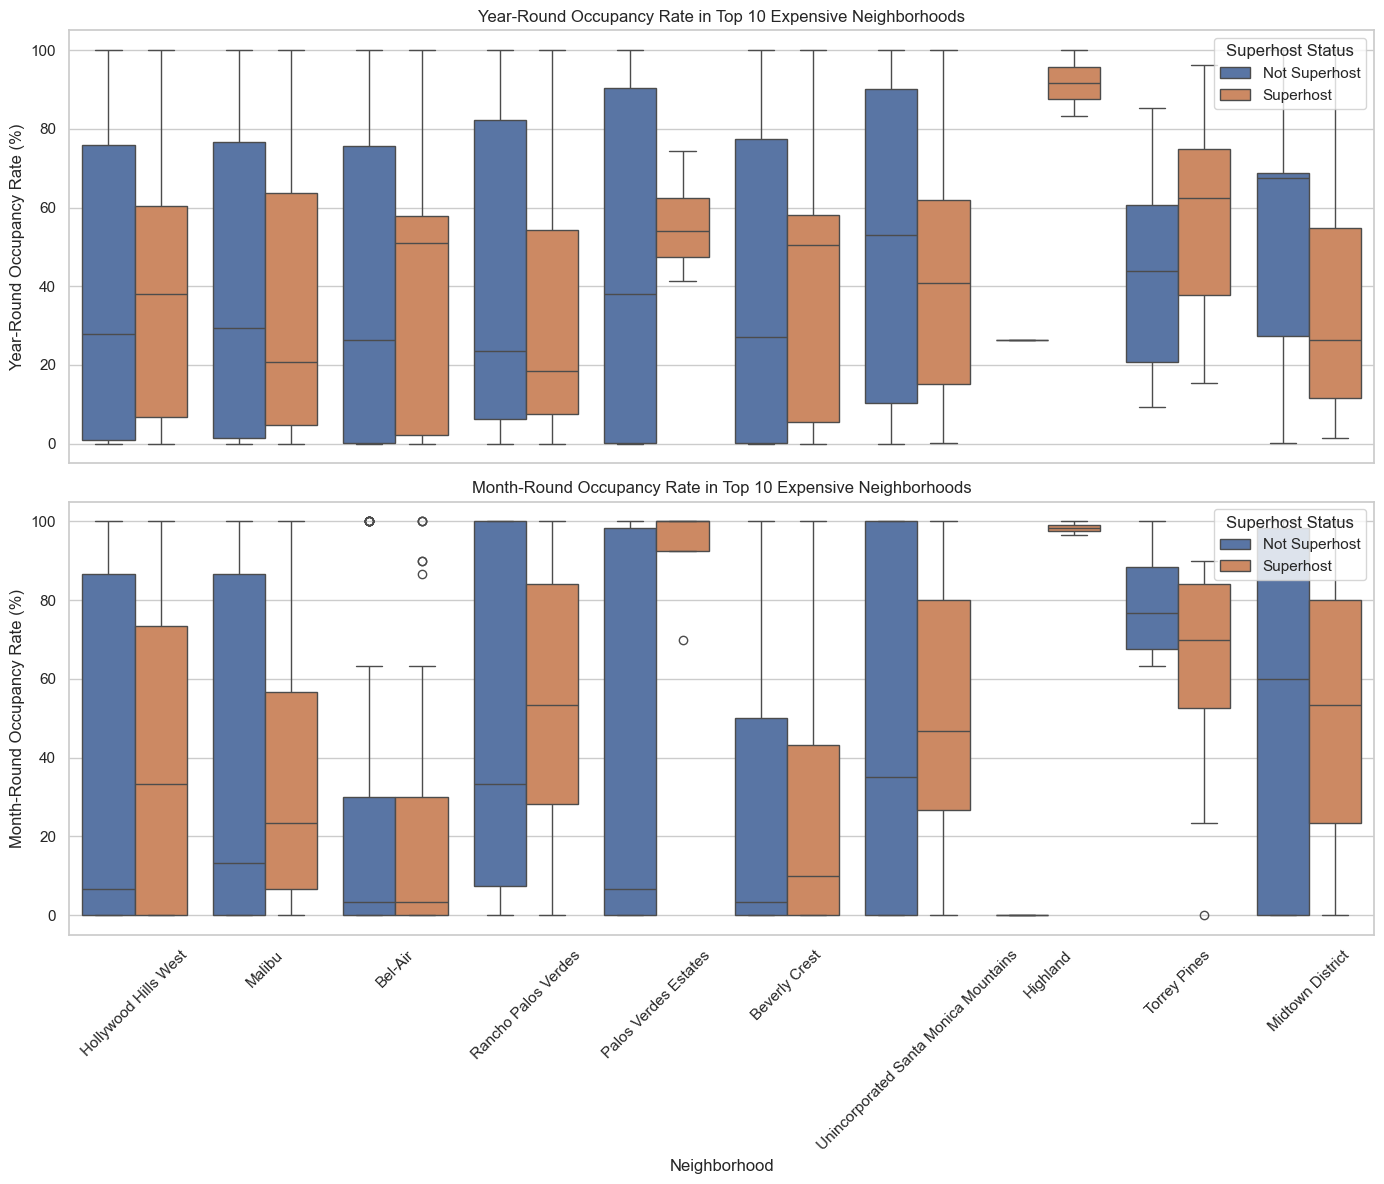

Plot saved successfully at D:/MSDA_SJSU/Data 230/Project/Airbnb/top10_neighborhood_occupancy_rates.png.


In [ ]:
# Identify the top 10 expensive neighborhoods
top_10_expensive_neighborhoods = (
    df.groupby('neighbourhood_cleansed')['price'].mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data for the top 10 expensive neighborhoods
filtered_df = df[df['neighbourhood_cleansed'].isin(top_10_expensive_neighborhoods)]

# Set up the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# First subplot: year-round occupancy rate
sns.boxplot(
    data=filtered_df,
    x='neighbourhood_cleansed',
    y='year_round_occupancy_rate',
    hue='host_is_superhost',
    palette='deep',
    ax=axes[0]
)
axes[0].set_title('Year-Round Occupancy Rate in Top 10 Expensive Neighborhoods')
axes[0].set_xlabel('')
axes[0].set_ylabel('Year-Round Occupancy Rate (%)')
axes[0].legend(title='Superhost Status', loc='upper right')

# Second subplot: month-round occupancy rate
sns.boxplot(
    data=filtered_df,
    x='neighbourhood_cleansed',
    y='month_round_occupancy_rate',
    hue='host_is_superhost',
    palette='deep',
    ax=axes[1]
)
axes[1].set_title('Month-Round Occupancy Rate in Top 10 Expensive Neighborhoods')
axes[1].set_xlabel('Neighborhood')
axes[1].set_ylabel('Month-Round Occupancy Rate (%)')
axes[1].legend(title='Superhost Status', loc='upper right')

# Rotate x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot before showing it
#save_path = "D:/MSDA_SJSU/Data 230/Project/Airbnb/top10_neighborhood_occupancy_rates.png"
#plt.savefig(save_path, format='png', dpi=300)

# Show the plot
plt.show()

print(f"Plot saved successfully at {save_path}.")


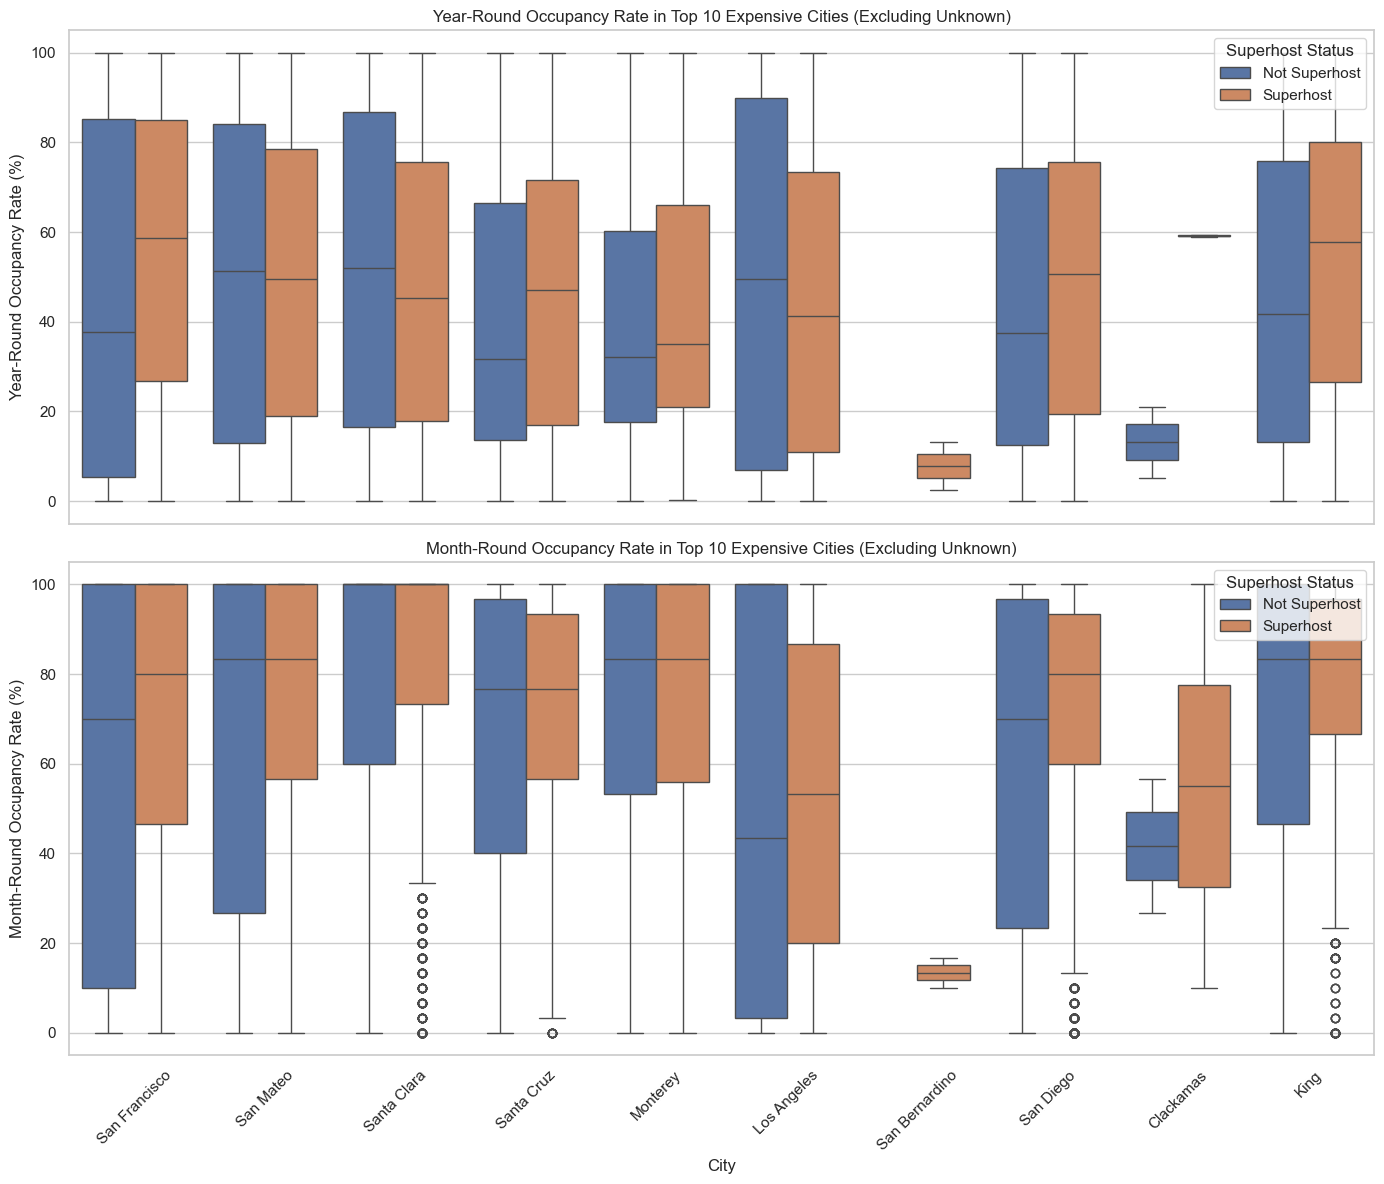

Plot saved successfully at D:/MSDA_SJSU/Data 230/Project/Airbnb/top10_city_occupancy_rates_excluding_unknown.png.


In [ ]:
# Identify the top 10 expensive cities, excluding 'Unknown'
top_10_expensive_City = (
    df[df['City'] != 'Unknown']  # Exclude 'Unknown'
    .groupby('City')['price'].mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data for the top 10 expensive cities
filtered_df = df[df['City'].isin(top_10_expensive_City)]

# Set up the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# First subplot: year-round occupancy rate
sns.boxplot(
    data=filtered_df,
    x='City',
    y='year_round_occupancy_rate',
    hue='host_is_superhost',
    palette='deep',
    ax=axes[0]
)
axes[0].set_title('Year-Round Occupancy Rate in Top 10 Expensive Cities (Excluding Unknown)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Year-Round Occupancy Rate (%)')
axes[0].legend(title='Superhost Status', loc='upper right')

# Second subplot: month-round occupancy rate
sns.boxplot(
    data=filtered_df,
    x='City',
    y='month_round_occupancy_rate',
    hue='host_is_superhost',
    palette='deep',
    ax=axes[1]
)
axes[1].set_title('Month-Round Occupancy Rate in Top 10 Expensive Cities (Excluding Unknown)')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Month-Round Occupancy Rate (%)')
axes[1].legend(title='Superhost Status', loc='upper right')

# Rotate x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot before showing it
#save_path = "D:/MSDA_SJSU/Data 230/Project/Airbnb/top10_city_occupancy_rates_excluding_unknown.png"
#plt.savefig(save_path, format='png', dpi=300)

# Show the plot
plt.show()

#print(f"Plot saved successfully at {save_path}.")


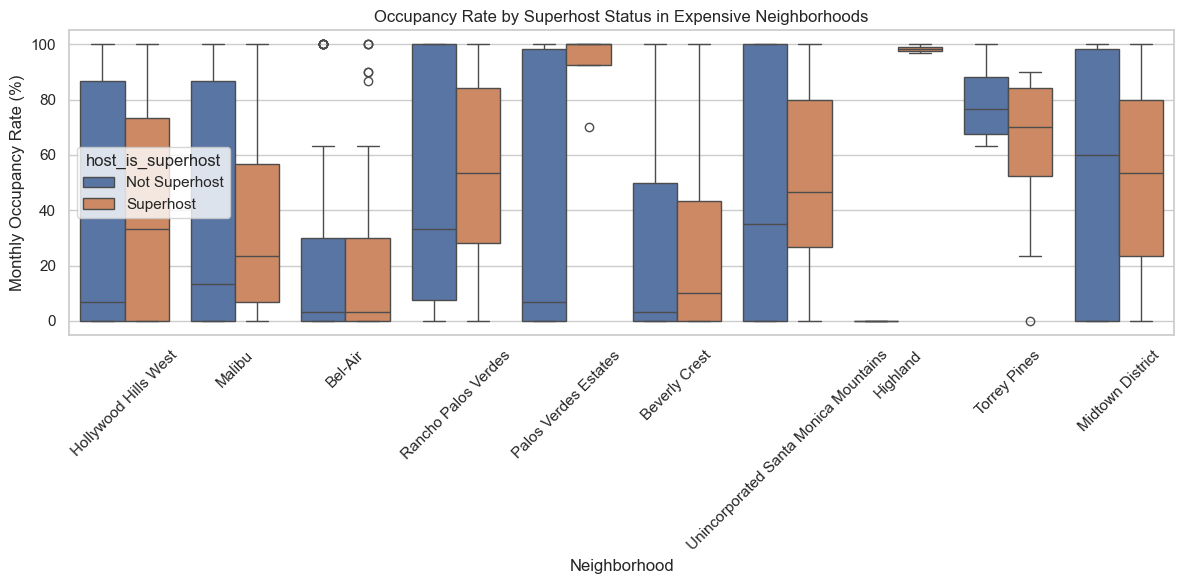

In [ ]:
## Occupancy rate in top expensive neighborhood based on Superhost status

# List of top 10 expensive neighborhoods (replace with actual neighborhood names)
#top_10_expensive_neighborhoods = ['Bel-Air', 'Midtown District', 'Malibu', 'Beverly Crest',
#                                   'Torrey Pines', 'Hollywood Hills West', 'Highland',
#                                   'Industrial District', 'Beverly Hills', 'Palos Verdes Estates']

# Filter the DataFrame for the top 10 expensive neighborhoods
df_expensive = df[df['neighbourhood_cleansed'].isin(top_10_expensive_neighborhoods.index.tolist())]

# Filter out rows with missing values in occupancy_rate and superhost status
df_filtered = df_expensive[['host_is_superhost', 'month_round_occupancy_rate', 'neighbourhood_cleansed']]

# Convert superhost status to categorical for better readability in the plot
#df_filtered['host_is_superhost'] = df_filtered['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Plot the relationship between superhost status and occupancy rate for expensive neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='neighbourhood_cleansed', y='month_round_occupancy_rate', hue='host_is_superhost', palette='deep')

# Add titles and labels
plt.title('Occupancy Rate by Superhost Status in Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Monthly Occupancy Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


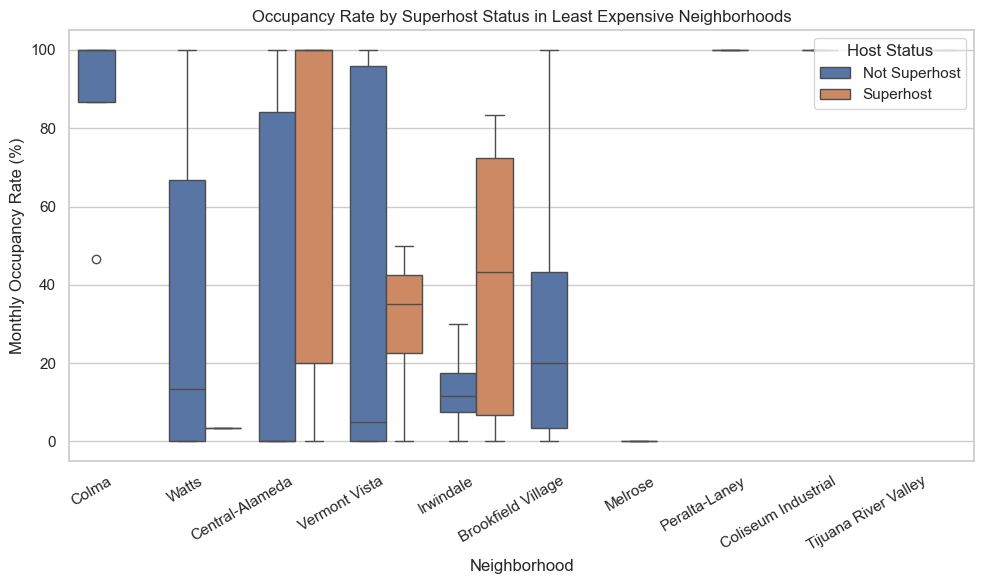

In [ ]:
# Filter the DataFrame for the top 10 expensive neighborhoods
df_inexpensive = df[df['neighbourhood_cleansed'].isin(bottom_10_expensive_neighborhoods.index.tolist())]

# Filter out rows with missing values in occupancy_rate and superhost status
df_filtered = df_inexpensive[['host_is_superhost', 'month_round_occupancy_rate', 'neighbourhood_cleansed']].dropna()

# Convert superhost status to categorical for better readability in the plot
#df_filtered['host_is_superhost'] = df_filtered['host_is_superhost'].map({1: 'Superhost', 0: 'Non-Superhost'})

# Simplified palette
#palette = {"Superhost": "green", "Non-Superhost": "blue"}

# Plot the relationship between superhost status and occupancy rate for expensive neighborhoods
plt.figure(figsize=(10, 6))  # Reduced width to avoid excessive spacing
sns.boxplot(data=df_filtered, x='neighbourhood_cleansed', y='month_round_occupancy_rate', hue='host_is_superhost', palette='deep')

# Add titles and labels
plt.title('Occupancy Rate by Superhost Status in Least Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Monthly Occupancy Rate (%)')
plt.xticks(rotation=30, ha='right')  # Slight rotation for better readability
plt.legend(title='Host Status', loc='upper right')  # Simplified legend position

plt.tight_layout()
plt.show()

### Correlation between numeric features

In [ ]:
# Convert the 'host_is_superhost' column to binary values
df['host_is_superhost_binary'] = df['host_is_superhost'].apply(lambda x: 1 if x == 'Superhost' else 0)

# Verify the conversion
print(df['host_is_superhost_binary'].value_counts())

host_is_superhost_binary
0    53190
1    37917
Name: count, dtype: int64


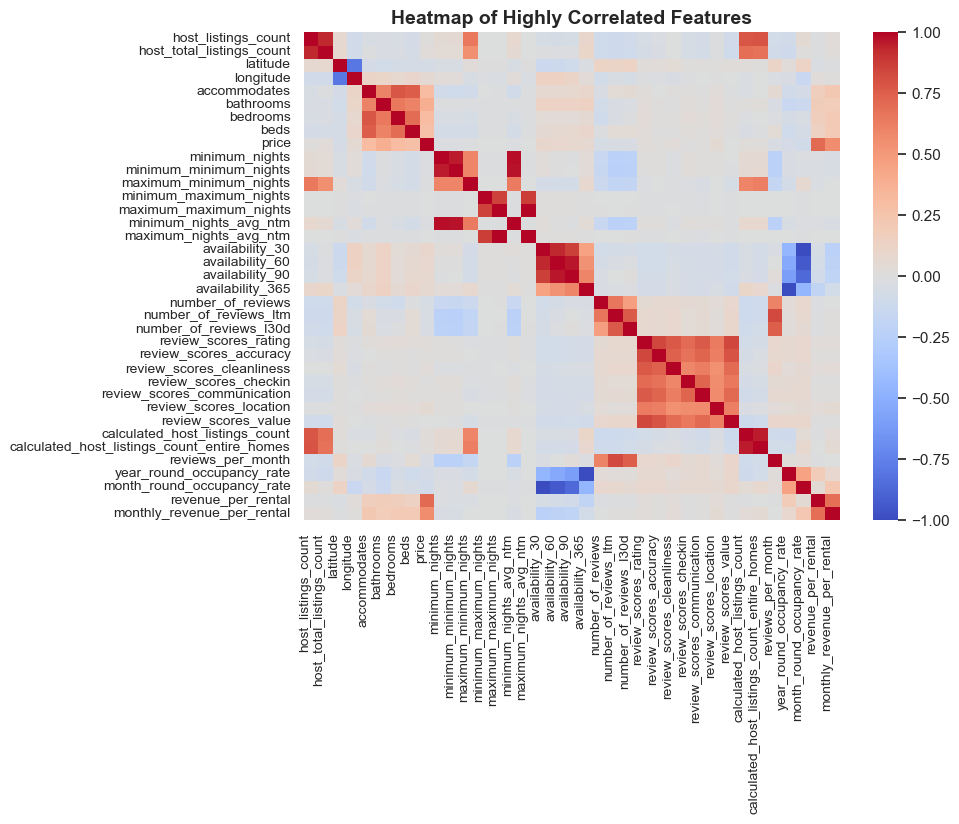

Highly correlated features:
['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'year_round_occupancy_rate', 'month_round_occupancy_rate', 'revenue_per_rental', 'monthly_revenue_per_rental']


In [ ]:
# Selecting only numeric features from the dataset
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Filter features with high correlation (absolute value > threshold) and exclude self-correlation
threshold = 0.5
high_correlation = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Select features with any correlation above the threshold
correlated_features = high_correlation.columns[np.any(high_correlation.abs() > threshold, axis=0)]
filtered_corr_matrix = correlation_matrix.loc[correlated_features, correlated_features]

# Plot the filtered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_corr_matrix,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 8}  # Reduce annotation size for better readability
)
plt.title("Heatmap of Highly Correlated Features", fontsize=14, weight='bold')
plt.xticks(rotation=90, fontsize=10, ha='right')  # Rotate labels for clarity
plt.yticks(fontsize=10)

# Save the plot before showing it
#save_path = "D:/MSDA_SJSU/Data 230/Project/Airbnb/Correlation_plot.png"
#plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 1.05])
plt.show()

# Print the list of highly correlated feature names
correlated_feature_names = list(filtered_corr_matrix.columns)
print("Highly correlated features:")
print(correlated_feature_names)


## Highly Correlated Features are:

Highly correlated features:
['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'year_round_occupancy_rate', 'month_round_occupancy_rate', 'revenue_per_rental', 'monthly_revenue_per_rental']